The goal of this project will be to carry out an exploratory data analysis in search of insights that can help with business strategies for Olist, a marketplace manager. Therefore, please note that our analysis will not focus on the marketplaces themselves, but in strategies for the growth of Olist, the manager of these marketplaces.

Because of that and also due to the database structure (we have 96477 orders and 93357 customers ID) i.e. practically one order per user, it won't be interesting to do user-level analyses, using concepts such as RFM (recency, frequency and monetary value) Therefore our analysis will be centered on the profile of sales in diferent states, categories, and through time.

The main questions to be answered throughout this project (summarized) are:

    *What are the states with the best cost-benefit of investments?

    *What are the best categories to search for new customers (promote new marketplaces)?

    *How are sales trends across states and categories, and how can we use this as strategies?


We will work with an ecommerce public dataset. The dataset has information of ~100k orders from 2016 to 2018 made at multiple marketplaces in Brazil by customers of Olist.

# Loading Data and Initial Treatment

The data is split into multiple datasets for better understanding and organization. So in this section we will take a look at all the files and create a DataFrame with the most important information to start our analysis. We will also deal with a few missing values to work with a consistent dataset.

In [1]:
import pandas as pd
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import re
from datetime import datetime

In [2]:
#Taking a quick look at our data

all_files = os.listdir()
olist_files = [i for i in all_files if re.match('olist_',i)]

for file in olist_files:
    provisory_df = pd.read_csv(file)
    print(f'\nfile name: {file}',
          f'\nfile shape: {provisory_df.shape}')
    display(provisory_df.sample(2))


file name: olist_customers_dataset.csv 
file shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
10484,cd1cae0cec827aad93250c9c72e88240,592eac42cd018a90af006cc5495ebaf9,13282,vinhedo,SP
29446,767e4ba055522e74663c7e2de6630844,16f2c763fb39cef72b929170a8ba7527,82620,curitiba,PR



file name: olist_geolocation_dataset.csv 
file shape: (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
320586,13808,-22.449664,-46.934213,mogi mirim,SP
515291,28300,-21.195802,-41.903534,itaperuna,RJ



file name: olist_orders_dataset.csv 
file shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
56570,4bf076e869b9f6d8f4a470a9850ed57a,17a7ed1c58dffc2bad134c5e67d73393,delivered,2018-06-06 08:37:16,2018-06-06 09:11:22,2018-06-06 13:22:00,2018-06-07 17:06:27,2018-07-03 00:00:00
592,5e0311cb517d342851ca3b346cd4c5ab,3ac33dfea62e0b085b5cfeb64bee5f21,delivered,2017-12-10 23:35:48,2017-12-10 23:49:19,2017-12-13 17:13:08,2017-12-27 20:41:46,2018-01-16 00:00:00



file name: olist_order_items_dataset.csv 
file shape: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
37443,54f9756bd9148ebde702040750fa59de,1,542d8fcc4a81cd455526d35b556437b7,5d0363b33554b373851fc1622e4d5f3c,2017-12-29 02:18:26,89.9,16.35
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01



file name: olist_order_payments_dataset.csv 
file shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
95794,28c04306e978f12f75bf6d7a989a4ccf,1,credit_card,1,41.10
11223,61ead1968b0009a553a0cfd8043ac41b,1,credit_card,2,31.84



file name: olist_order_reviews_dataset.csv 
file shape: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
64238,ca93820aacfb46dd633b5fe940b0c5b1,03a85a6adb776ffefc4a8d7f845b10a4,4,NaN,NaN,2018-07-05 00:00:00,2018-07-11 02:51:31
31178,6ebcff50252184bf668c6945aa5d941e,0828f00051736863b477ea7277ddda6f,4,NaN,NaN,2017-10-06 00:00:00,2017-10-06 20:16:52



file name: olist_products_dataset.csv 
file shape: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
21478,ad0a798e7941f3a5a2fb8139cb62ad78,cama_mesa_banho,55.0,617.0,1.0,600.0,16.0,10.0,16.0
15950,f81b171b346c639cb5a7cbab8dfac7c4,informatica_acessorios,60.0,969.0,1.0,175.0,17.0,12.0,11.0



file name: olist_sellers_dataset.csv 
file shape: (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
774,23a0ffca143a15b9b5bbdb7d552f626a,13520,sao pedro,SP
1899,1cbcd2ee0afb3fc09963b87eb65e7e4f,82640,curitiba,PR


In [3]:
#Lets load the most relevant dfs for now
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_products_dataset = pd.read_csv('olist_products_dataset.csv')
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')  
olist_sellers_dataset= pd.read_csv('olist_sellers_dataset.csv')  
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
olist_customers_dataset = pd.read_csv('olist_customers_dataset.csv')

In [4]:
#create a single df with most relevant infos 
eda_df = pd.merge(olist_order_items_dataset, olist_products_dataset,how = 'left', on = 'product_id')
eda_df = pd.merge(eda_df, olist_order_payments_dataset,how = 'left', on ='order_id')
eda_df = pd.merge(eda_df,olist_sellers_dataset, how = 'left', on ='seller_id')

custumer_df = pd.merge(olist_orders_dataset,olist_customers_dataset, on ='customer_id',how = 'left')
eda_df = pd.merge(eda_df,custumer_df, on = 'order_id' , how = 'left' )
eda_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [5]:
#filtering the data
eda_df_resumed = eda_df[['order_id','product_category_name','price',
                         'freight_value','payment_type','payment_installments',
                         'payment_value','seller_state','shipping_limit_date',
                         'order_status','order_purchase_timestamp','order_delivered_customer_date',
                         'customer_unique_id','customer_state']]

eda_df_resumed.head()

,order_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_state,shipping_limit_date,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.90,13.29,credit_card,2.0,72.19,SP,2017-09-19 09:45:35,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,RJ
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,239.90,19.93,credit_card,3.0,259.83,SP,2017-05-03 11:05:13,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,SP
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao,199.00,17.87,credit_card,5.0,216.87,MG,2018-01-18 14:48:30,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,MG
3,00024acbcdf0a6daa1e931b038114c75,perfumaria,12.99,12.79,credit_card,2.0,25.78,SP,2018-08-15 10:10:18,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim,199.90,18.14,credit_card,3.0,218.04,PR,2017-02-13 13:57:51,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,SP


In [6]:
#we are going to work only with order fully delivered
eda_df_resumed = eda_df_resumed[eda_df_resumed.order_status == 'delivered']

In [7]:
#missing values

eda_df_resumed2 = eda_df_resumed.copy()
print('general view of nan values:')
display(eda_df_resumed[eda_df_resumed.isna().any(axis=1)].head())

print('When product_category_name is nan, it means that the product just dont have a category defined,'
      ' so filing it with NA  seems appropriate')
eda_df_resumed2.product_category_name.fillna('NA', inplace = True)

print('\nview of nan values after treating category names:')
display(eda_df_resumed2[eda_df_resumed2.isna().any(axis=1)])
print(f'\nthere are only {len(eda_df_resumed2[eda_df_resumed2.isna().any(axis=1)])} nan cases.' 
      '\nMost are values that appear as delivered, but do not have delivery data, and one dont have payment type' 
      '\nThese cases must be analyzed by the appropriate area, but for now we will just drop them')
       
eda_df_resumed2 = eda_df_resumed2[~pd.isnull(eda_df_resumed2.payment_type)].reset_index(drop=True)
eda_df_resumed2

general view of nan values:


,order_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_state,shipping_limit_date,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_state
125,0046e1d57f4c07c8c92ab26be8c3dfc0,NaN,7.79,7.78,credit_card,1.0,15.57,SP,2017-10-02 15:49:17,delivered,2017-09-26 15:24:03,2017-09-29 18:29:50,b0efd7adeb04d15b16edaedd11215d40,SP
127,00482f2670787292280e0a8153d82467,NaN,7.60,10.96,boleto,1.0,18.56,MG,2017-02-17 16:18:07,delivered,2017-02-13 16:18:07,2017-02-15 11:35:56,d4c784ecad19dfe09e63ffaf9ada82a3,MG
134,004f5d8f238e8908e6864b874eda3391,NaN,122.99,15.61,boleto,1.0,138.60,SP,2018-03-06 09:29:25,delivered,2018-02-27 12:16:30,2018-03-23 00:52:43,17726716a98c98a7806b43a789820245,MS
144,0057199db02d1a5ef41bacbf41f8f63b,NaN,20.30,16.79,boleto,1.0,37.09,SP,2018-01-25 09:07:51,delivered,2018-01-18 17:05:30,2018-02-06 20:07:20,9a5b186787a143669398bd8083720c21,MT
173,006cb7cafc99b29548d4f412c7f9f493,NaN,56.00,14.14,credit_card,3.0,70.14,SP,2018-02-22 13:35:28,delivered,2018-02-17 14:22:34,2018-02-25 13:46:52,d5faae3f913e775994e53068992969b5,DF


When product_category_name is nan, it means that the product just dont have a category defined, so filing it with NA  seems appropriate

view of nan values after treating category names:


,order_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_state,shipping_limit_date,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_state
6071,0d3268bad9b086af767785e3f0fc0133,brinquedos,188.99,15.63,credit_card,4.0,204.62,SP,2018-07-05 21:29:54,delivered,2018-07-01 21:14:02,NaN,ebf7e0d43a78c81991a4c59c145c75db,SP
15108,20edc82cf5400ce95e1afacc25798b31,livros_interesse_geral,45.90,9.07,credit_card,1.0,54.97,SP,2018-07-03 16:29:30,delivered,2018-06-27 16:09:12,NaN,175378436e2978be55b8f4316bce4811,SP
20541,2d1e2d5bf4dc7227b3bfebb81328c15f,automotivo,117.30,17.53,credit_card,3.0,134.83,SP,2017-12-04 17:56:40,delivered,2017-11-28 17:44:07,NaN,13467e882eb3a701826435ee4424f2bd,SP
20742,2d858f451373b04fb5c984a1cc2defaf,esporte_lazer,179.00,15.00,credit_card,4.0,194.00,SP,2017-06-04 23:30:16,delivered,2017-05-25 23:22:43,NaN,d77cf4be2654aa70ef150f8bfec076a6,RS
21313,2ebdfc4f15f23b91474edf87475f108e,relogios_presentes,139.00,19.07,credit_card,3.0,158.07,MG,2018-07-05 17:15:12,delivered,2018-07-01 17:05:11,NaN,1bd06a0c0df8b23dacfd3725d2dc0bb9,SP
78671,ab7c89dc1bf4a1ead9d6ec1ec8968a84,informatica_acessorios,110.99,9.13,credit_card,5.0,120.12,SP,2018-06-18 12:30:35,delivered,2018-06-08 12:09:39,NaN,cce5e8188bf42ffb3bb5b18ff58f5965,SP
88091,bfbd0f9bdef84302105ad712db648a6c,beleza_saude,44.99,2.83,NaN,NaN,NaN,PR,2016-09-19 23:11:33,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,830d5b7aaa3b6f1e9ad63703bec97d23,SP
88092,bfbd0f9bdef84302105ad712db648a6c,beleza_saude,44.99,2.83,NaN,NaN,NaN,PR,2016-09-19 23:11:33,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,830d5b7aaa3b6f1e9ad63703bec97d23,SP
88093,bfbd0f9bdef84302105ad712db648a6c,beleza_saude,44.99,2.83,NaN,NaN,NaN,PR,2016-09-19 23:11:33,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,830d5b7aaa3b6f1e9ad63703bec97d23,SP
106084,e69f75a717d64fc5ecdfae42b2e8e086,relogios_presentes,139.00,19.07,credit_card,1.0,158.07,MG,2018-07-05 22:15:14,delivered,2018-07-01 22:05:55,NaN,3bc508d482a402715be4d5cf4020cc81,SP



there are only 11 nan cases.
Most are values that appear as delivered, but do not have delivery data, and one dont have payment type
These cases must be analyzed by the appropriate area, but for now we will just drop them


,order_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_state,shipping_limit_date,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.90,13.29,credit_card,2.0,72.19,SP,2017-09-19 09:45:35,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,RJ
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,239.90,19.93,credit_card,3.0,259.83,SP,2017-05-03 11:05:13,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,SP
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao,199.00,17.87,credit_card,5.0,216.87,MG,2018-01-18 14:48:30,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,MG
3,00024acbcdf0a6daa1e931b038114c75,perfumaria,12.99,12.79,credit_card,2.0,25.78,SP,2018-08-15 10:10:18,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim,199.90,18.14,credit_card,3.0,218.04,PR,2017-02-13 13:57:51,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115030,fffc94f6ce00a00581880bf54a75a037,utilidades_domesticas,299.99,43.41,boleto,1.0,343.40,SC,2018-05-02 04:11:01,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,0c9aeda10a71f369396d0c04dce13a64,MA
115031,fffcd46ef2263f404302a634eb57f7eb,informatica_acessorios,350.00,36.53,boleto,1.0,386.53,SP,2018-07-20 04:31:48,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,0da9fe112eae0c74d3ba1fe16de0988b,PR
115032,fffce4705a9662cd70adb13d4a31832d,esporte_lazer,99.90,16.95,credit_card,3.0,116.85,PR,2017-10-30 17:14:25,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,cd79b407828f02fdbba457111c38e4c4,SP
115033,fffe18544ffabc95dfada21779c9644f,informatica_acessorios,55.99,8.72,credit_card,3.0,64.71,SP,2017-08-21 00:04:32,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,eb803377c9315b564bdedad672039306,SP


# Exploratory Analysis

In this section we will explore our data in order to answer the following questions:


*Which categories have the greatest potential to generate revenue? 

*The most indicated categories for marketing actions

*Should the strategies be thought of at the national or state level?

*How the number of sellers and the freight price influence a state's sales?

*What are the main differences between sales in different states and how can we use this as a strategy?

*Is the distribution of vouchers a good strategy considering the scenario presented?

In [8]:
#let's start with some statistical information to understand our base
statistic_summary = eda_df_resumed2.copy()
display(statistic_summary.describe())
statistic_summary.describe(include ='O')

,price,freight_value,payment_installments,payment_value
count,115035.000000,115035.00000,115035.000000,115035.000000
mean,120.083702,19.99557,2.936706,171.914291
std,183.029335,15.74333,2.772365,266.108823
min,0.850000,0.00000,0.000000,0.000000
25%,39.900000,13.08000,1.000000,60.850000
50%,74.900000,16.28000,2.000000,108.190000
75%,133.000000,21.18000,4.000000,188.940000
max,6735.000000,409.68000,24.000000,13664.080000


,order_id,product_category_name,payment_type,seller_state,shipping_limit_date,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_state
count,115035,115035,115035,115035,115035,115035,115035,115027,115035,115035
unique,96477,74,4,22,91343,1,95955,95657,93357,27
top,895ab968e7bb0d5659d16cd74cd1650c,cama_mesa_banho,credit_card,SP,2017-08-14 20:43:31,delivered,2017-08-08 20:26:31,2017-08-14 12:46:18,9a736b248f67d166d2fbb006bcb877c3,SP
freq,63,11650,84896,82061,63,115035,63,63,75,48522


In [9]:
#let's create a summary to focus on the sales categories

eda_df_resumed3 = eda_df_resumed2.copy()

#creating columns to summarize payment type
for payment_type in eda_df_resumed2.payment_type.unique():
    eda_df_resumed3[payment_type] = [1 if i ==payment_type else 0 for i in eda_df_resumed2.payment_type]
    
#creating columns to summarize infos about the state of sales
for state in eda_df_resumed2.customer_state.unique():
    eda_df_resumed3[state] = [1 if i ==state else 0 for i in eda_df_resumed2.customer_state]
 
#creating our summary
category_summary = eda_df_resumed2.groupby('product_category_name',as_index = False).agg({'price':'sum',
                                                                                         'freight_value':'sum',
                                                                                          'payment_installments':'mean',
                                                                                          'payment_value':'mean',
                                                                                          'order_id':'count'
                                                                                        })

#adding states and payment infos to our summary
dummy_variable_df = eda_df_resumed3.iloc[:,11:]
dummy_variable_df['product_category_name'] = eda_df_resumed3['product_category_name']
dummy_variable_df_gb = dummy_variable_df.groupby('product_category_name',as_index=False).sum()

category_summary2 = pd.merge(category_summary,dummy_variable_df_gb, how='left', on = 'product_category_name')
category_summary2.sort_values(by=['price'],ascending = False,inplace=True)
category_summary2.reset_index(drop=True, inplace=True)
category_summary2.head()


,product_category_name,price,freight_value,payment_installments,payment_value,order_id,credit_card,boleto,voucher,debit_card,...,PB,AM,AP,PI,TO,RO,RN,SE,AC,RR
0,beleza_saude,1271333.29,184693.54,3.021928,166.070708,9759,7418,1814,373,154,...,82,21,10,55,36,28,67,38,7,6
1,relogios_presentes,1213440.80,101889.27,3.664468,228.748961,6065,4750,1005,249,61,...,42,10,8,44,29,14,49,20,5,1
2,cama_mesa_banho,1077968.13,214611.10,3.551245,145.297363,11650,8820,1858,834,138,...,32,9,6,35,10,15,34,15,4,3
3,esporte_lazer,990644.22,169282.60,2.488034,154.522722,8733,6464,1737,408,124,...,31,13,8,33,26,20,23,33,9,8
4,informatica_acessorios,918948.86,149837.30,2.257027,196.172777,7898,5317,2095,338,148,...,56,19,9,35,22,23,31,36,8,4


In [10]:
#Preparing formatting for our graphics

from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    'The two args are the value and tick position'
    return 'R$%1.1fM' % (x*1e-6)


def thousands_formatter(x, pos):
    'The two args are the value and tick position'
    return 'R$%1.1fK' % (x*1e-3)

def percent_formatter(x, pos):
    'The two args are the value and tick position'
    return '%1.0f' % (x) + '%'

def reais_formatter(x, pos):
    'The two args are the value and tick position'
    return 'R$%1.0f' % (x)

formatter = FuncFormatter(millions_formatter)
p_formatter = FuncFormatter(percent_formatter)
r_formatter = FuncFormatter(reais_formatter)
t_formatter = FuncFormatter(thousands_formatter)

sns.set_style("white")
plt.rcParams.update({'font.size': 12,
                     'axes.labelweight': 'bold',
                     'axes.titleweight': 'bold',
                     'font.weight': 'bold'})



consider that we have 74 categories in total
 


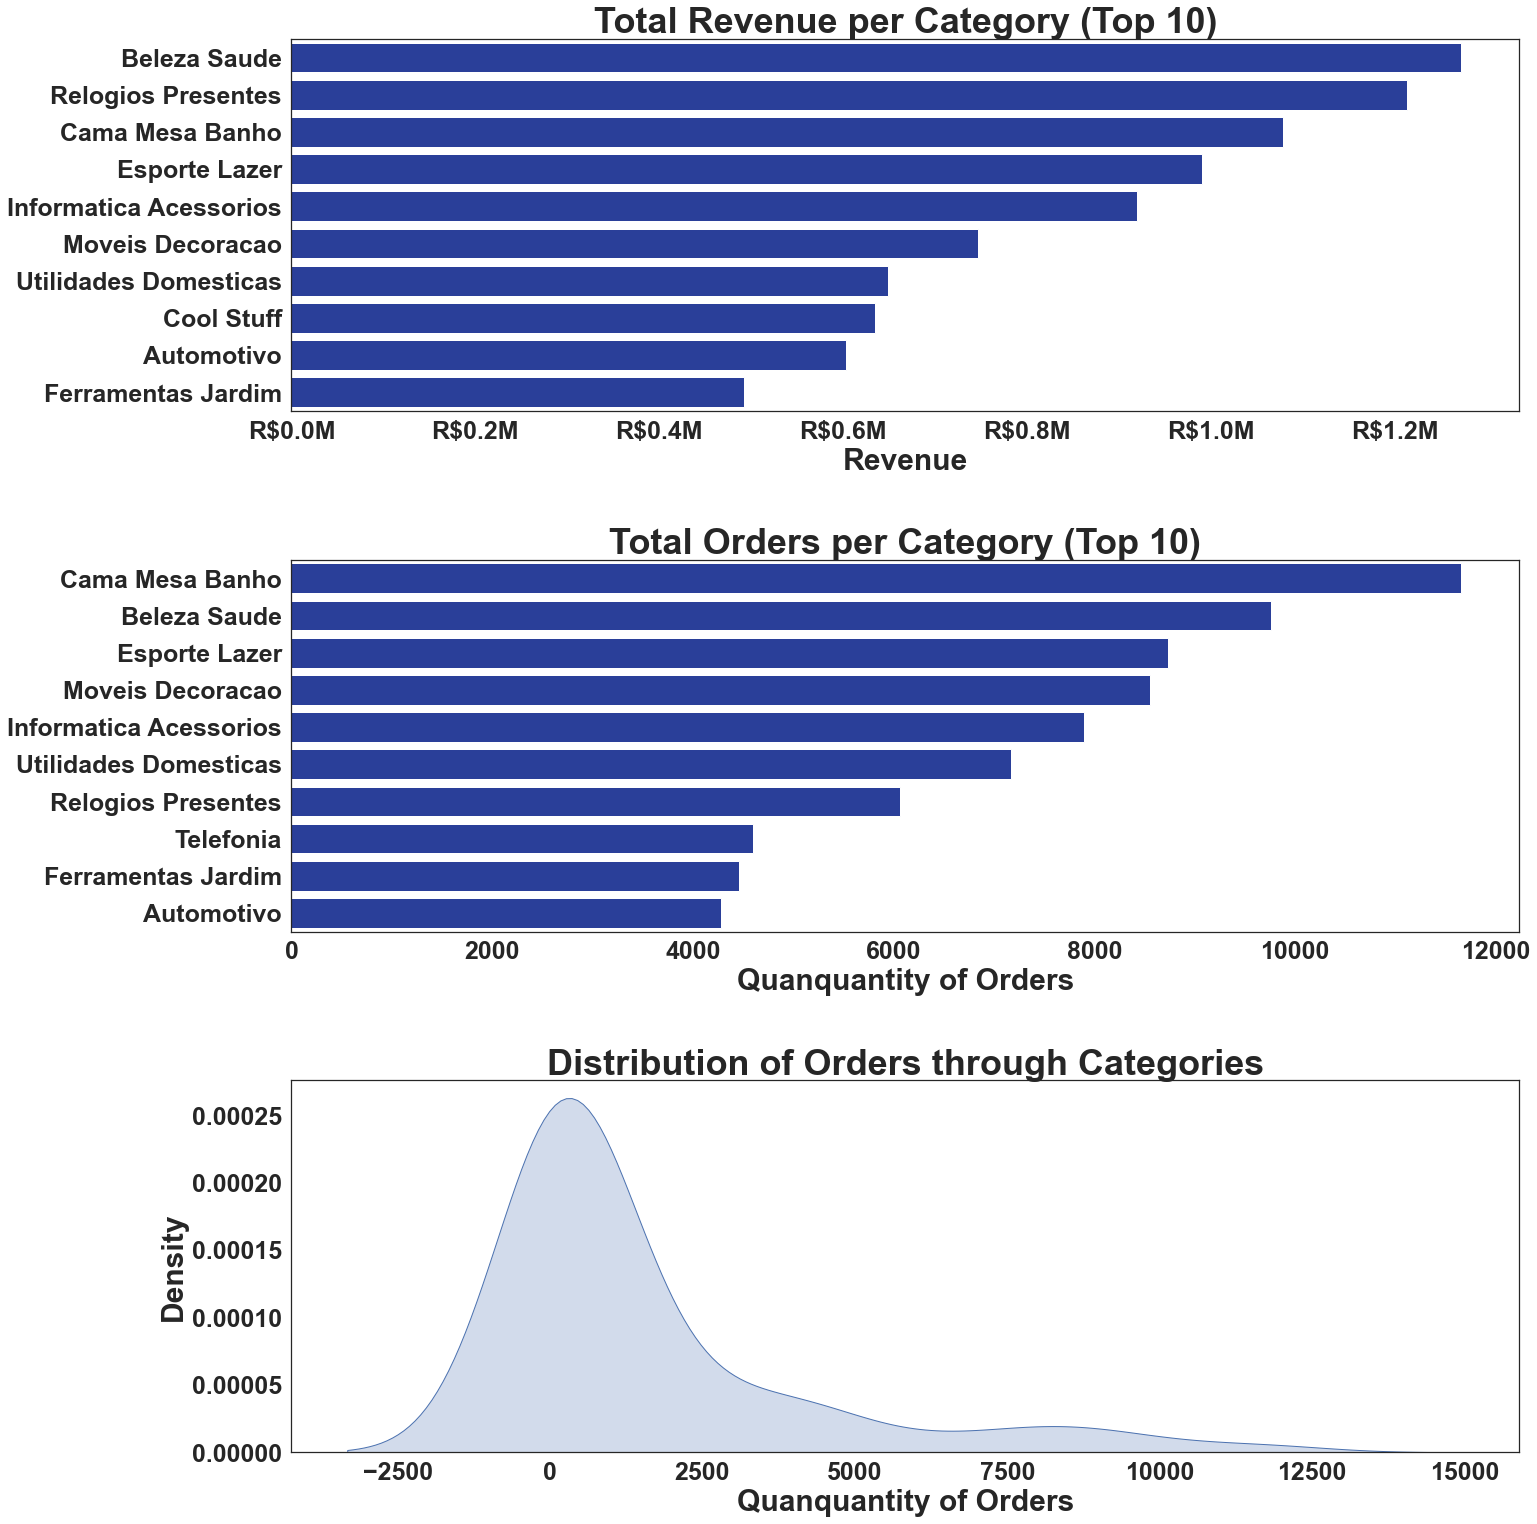

In [11]:
#Starting with a simple view to better understand the categories

print(f'consider that we have {len(category_summary2)} categories in total\n ')
fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(22,26))

#barplot - biggest revenues per category
categories_names = [re.sub('_',' ',i).title() for i in category_summary2.product_category_name[0:10]]
sns.barplot(y=categories_names,
            x=category_summary2.price[0:10],
            color ='#1833ab', ax = ax1)

ax1.set_title("Total Revenue per Category (Top 10)",fontsize = 36)
ax1.set_xlabel("Revenue",fontsize=30)
ax1.set_ylabel("",fontsize=25)
ax1.tick_params(labelsize=25)
ax1.xaxis.set_major_formatter(formatter)


#barplot - Most ordered categories
category_summary2_orders = category_summary2.sort_values(by=['order_id'],ascending = False)

categories_names2 = [re.sub('_',' ',i).title() for i in category_summary2_orders.product_category_name[0:10]]
sns.barplot(y=categories_names2,
            x=category_summary2_orders.order_id[0:10],
            color ='#1833ab', ax = ax2)

ax2.set_title("Total Orders per Category (Top 10)",fontsize = 36)
ax2.set_xlabel("Quanquantity of Orders",fontsize=30)
ax2.set_ylabel("",fontsize=25)
ax2.tick_params(labelsize=25)

#kdeplot - Categories distribution
sns.kdeplot(data =category_summary2_orders.order_id,shade =True, ax = ax3)
ax3.set_title("Distribution of Orders through Categories",fontsize = 36)
ax3.set_xlabel("Quanquantity of Orders",fontsize=30)
ax3.set_ylabel("Density",fontsize=30)
ax3.tick_params(labelsize=25)

plt.subplots_adjust(hspace = 0.4)
plt.show()

we noticed that few categories are responsible for a large part of the total revenue, and answered  what are the categories that bring in the most revenue and have the most orders.

But to take any conclusions, we have to look at the behavior of each state

In [12]:
#let's create a summary to better understand the sales by states 

state_df = eda_df_resumed2.groupby(
    'customer_state',as_index = False).agg({'payment_value':'sum',
                                          'freight_value':'mean',
                                          'order_id':'count'
                                         }).sort_values(by=['order_id'],ascending = False).reset_index(drop=True)

state_df['sales_revenue_percent'] = [i*100/sum(state_df.payment_value) for i in state_df.payment_value]
state_df['sales_orders_percent'] = [i*100/sum(state_df.order_id) for i in state_df.order_id]
state_df.head()

,customer_state,payment_value,freight_value,order_id,sales_revenue_percent,sales_orders_percent
0,SP,7403993.29,15.167205,48522,37.438983,42.180206
1,RJ,2688933.90,21.060483,14873,13.596845,12.929109
2,MG,2281229.16,20.624652,13417,11.535248,11.663407
3,RS,1110976.47,21.698494,6383,5.617756,5.548746
4,PR,1030822.39,20.521520,5868,5.212450,5.101056


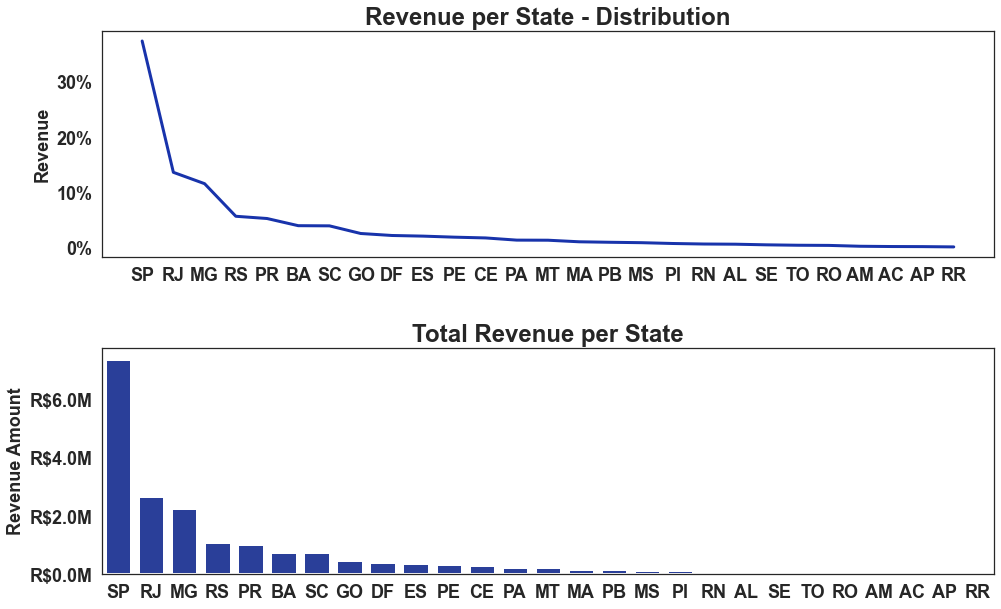

In [13]:
#viewing the data

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,10))
state_df.sort_values(by =['sales_revenue_percent'],ascending = False, inplace= True)
sns.set_style("white")
sns.lineplot(y=state_df.sales_revenue_percent,
            x=state_df.customer_state,
            color ='#1833ab',lw =3, ax = ax1)

ax1.set_title("Revenue per State - Distribution",fontsize = 24)
ax1.set_xlabel("",fontsize=18)
ax1.set_ylabel("Revenue",fontsize=18)
ax1.tick_params(labelsize=18)
ax1.yaxis.set_major_formatter(p_formatter)

state_df.sort_values(by =['payment_value'],ascending = False, inplace= True)

sns.barplot(y=state_df.payment_value,
            x=state_df.customer_state,
            color ='#1833ab',lw =3, ax = ax2)

ax2.set_title("Total Revenue per State",fontsize = 24)
ax2.set_xlabel("",fontsize=18)
ax2.set_ylabel("Revenue Amount",fontsize=18)
ax2.tick_params(labelsize=18)
ax2.yaxis.set_major_formatter(formatter)

plt.subplots_adjust(hspace = 0.4)
plt.show()

We noticed that most of the orders and revenue are concentrated in the state of SP. We know that this is the most populous state, which certainly influences sales, but considering the size of the difference, we can say that this is not the only factor.

We need to understand why other states have such a low number of orders, which leads us to create some hypotheses described below.

1º We have many more sellers in sp than in other states, which naturally generates more orders in sp

    *To test this hypothesis we will test if there is a relationship between quantity of sellers in a state, and quantity of orders in the same state.
    
2nd Is the cost of freight much higher in one state than in another?

    *To test this hypothesis we will test if there is a relationship between freight costs in a state, and quantity of orders in the same state. 
    
Ps: in bouth analysis we need to be careful with the differences between the categories


In [14]:
#We already  have a summary for the states informations.
#Now we are going to recovery sellers infos and add it to our state summary DataFrame. 
#with this new summary we hope to answer the hypotheses created above

sellers_summary = pd.read_csv('olist_sellers_dataset.csv')
sellers_summary.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
#Creating a state-sellers summary
sellers_summary_gp = sellers_summary.groupby('seller_state', as_index = False).seller_id.count()
sellers_summary_gp.sort_values(by=['seller_id'], ascending = False, inplace = True)

#adding info for each state
sellers_summary_final = pd.merge(sellers_summary_gp,state_df, how = 'left', left_on = 'seller_state', right_on = 'customer_state')
sellers_summary_final.drop(['payment_value','order_id','customer_state'],axis =1, inplace = True)
sellers_summary_final.rename(columns = {'seller_id': 'qnt_sellers'},inplace= True)

#retrieving percentages
sellers_summary_final['sellers_percent'] = [
    round(i*100/sum(sellers_summary_final.qnt_sellers),2) for i in sellers_summary_final.qnt_sellers]
sellers_summary_final['freight_value'] = round(sellers_summary_final['freight_value'],2)
sellers_summary_final['sales_revenue_percent'] = round(sellers_summary_final['sales_revenue_percent'],2)
sellers_summary_final['sales_orders_percent'] = round(sellers_summary_final['sales_orders_percent'],2)
sellers_summary_final.head()

,seller_state,qnt_sellers,freight_value,sales_revenue_percent,sales_orders_percent,sellers_percent
0,SP,1849,15.17,37.44,42.18,59.74
1,PR,349,20.52,5.21,5.10,11.28
2,MG,244,20.62,11.54,11.66,7.88
3,SC,190,21.46,3.88,3.67,6.14
4,RJ,171,21.06,13.60,12.93,5.53


In [16]:
#Melt top 10 states infos to vizualize our data

data_viz_df = pd.melt(sellers_summary_final[0:10],
             id_vars="seller_state",
             value_vars = ['sales_orders_percent','sellers_percent'],
             var_name="type",
             value_name="percentage")

data_viz_df['type'] = data_viz_df['type'].apply(
    lambda x: 'Sales Orders' if x == 'sales_orders_percent' else 'Sellers')

data_viz_df.sample(4)

,seller_state,type,percentage
4,RJ,Sales Orders,12.93
5,RS,Sales Orders,5.55
17,DF,Sellers,0.97
18,ES,Sellers,0.74


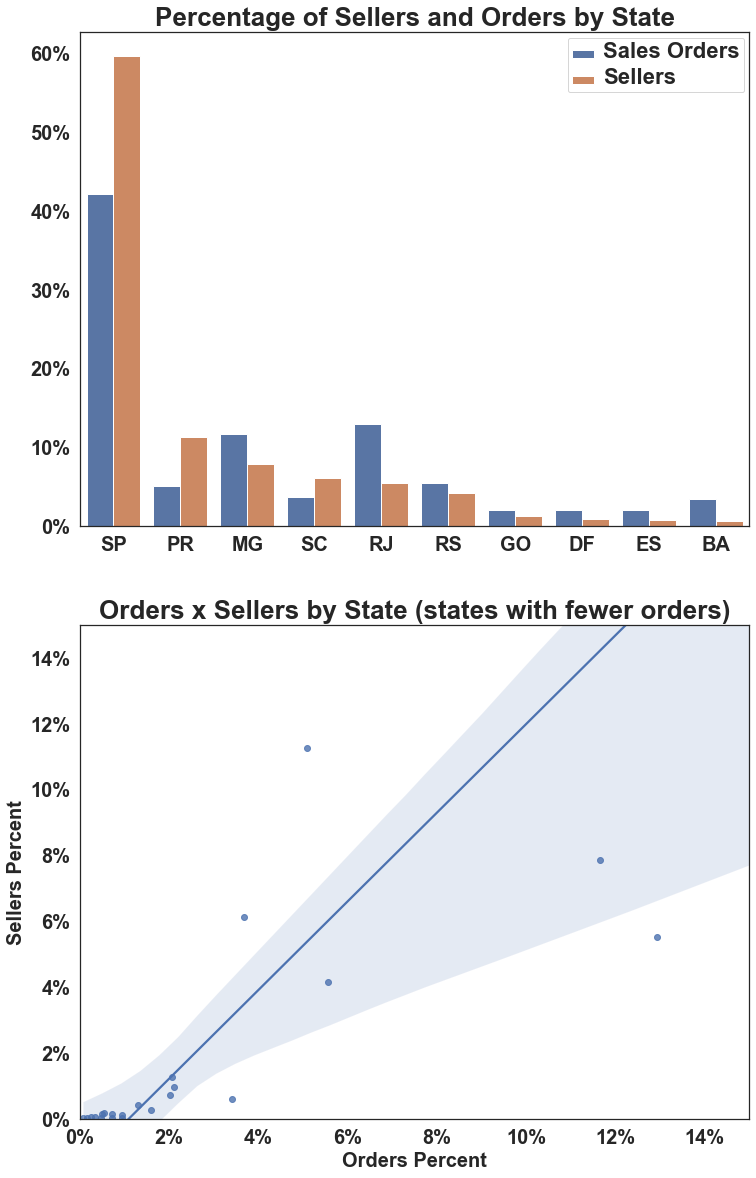

In [17]:
#vizualizing relationship between orders and number of sellers by state

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,20))

sns.barplot(x = 'seller_state',
            y = 'percentage',
            hue = 'type',
            data = data_viz_df,
            palette="deep",
            ax =ax1)

ax1.legend()
ax1.set_title('Percentage of Sellers and Orders by State',fontsize = 26)
ax1.set_ylabel("",fontsize=20)
ax1.set_xlabel("",fontsize=20)
ax1.tick_params(labelsize=20)
plt.setp(ax1.get_legend().get_texts(), fontsize='22') 
ax1.yaxis.set_major_formatter(p_formatter)

sns.regplot(x=sellers_summary_final['sales_orders_percent'], y=sellers_summary_final['sellers_percent'],ax = ax2)
ax2.set_title('Orders x Sellers by State (states with fewer orders)',fontsize = 26)
ax2.set_ylabel("Sellers Percent",fontsize=20)
ax2.set_xlabel("Orders Percent",fontsize=20)
ax2.tick_params(labelsize=20)
ax2.yaxis.set_major_formatter(p_formatter)
ax2.xaxis.set_major_formatter(p_formatter)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()


Most sellers are concentrated in SP, and the other states with good revenue such as RJ, MG, PR and RS are states located close to SP. Therefore, a relationship between the amount of sales in the state and the number of sellers is insufficient. We must cover the relationship in terms of region, then we can say that there is a relationship between the number of sellers in the region and the number of sales in the state. In this case, we see a clear dependence of our top revenue states on SP sellers.

In [18]:
#Creating a freight summary to understand relationship between freight and categories by states

cat_state_freight = eda_df_resumed3.copy()

for state in eda_df_resumed2.customer_state.unique():
    cat_state_freight[state] = [
        freight if i == state else 0 for i,freight in zip(eda_df_resumed2.customer_state,eda_df_resumed2.freight_value)]
    
cat_state_freight.drop(['order_id','freight_value', 'payment_type', 'payment_installments',
                        'payment_value', 'shipping_limit_date','credit_card', 'boleto','price',
                        'voucher', 'debit_card','seller_state'],axis = 1, inplace = True)

#change 0 for nan to calculate mean 
cat_state_freight[cat_state_freight == 0] = np.nan

cat_state_freight_gp = cat_state_freight.groupby('product_category_name',as_index = False).agg(np.nanmean)

#finding a list of top categories and sorting values by it
category_summary2.sort_values(by = ['order_id'],ascending =False, inplace = True)
top_categories = [i for i in category_summary2.product_category_name]

cat_state_freight_gp.set_index('product_category_name',inplace = True)
cat_state_freight_gp = cat_state_freight_gp.loc[top_categories]

#renaming categories 
cat_state_freight_gp.index = [
    re.sub('_',' ',i).title() for i in cat_state_freight_gp.index]

#top 10 states
top_10 = [i for i in state_df[0:10].customer_state]

#locking on top values
cat_state_freight_gp = cat_state_freight_gp.loc[:,top_10]
cat_state_freight_gp = cat_state_freight_gp.iloc[0:15]
cat_state_freight_gp.head()

,SP,RJ,MG,RS,PR,BA,SC,GO,DF,ES
Cama Mesa Banho,14.952504,19.546760,21.244307,20.124554,20.434559,24.702985,19.846471,20.774091,19.361972,19.509283
Beleza Saude,13.642714,18.214779,19.392491,20.920550,18.548839,24.865703,20.360545,21.742696,19.091331,22.002410
Esporte Lazer,14.853046,20.581115,21.043857,20.009153,18.858063,25.629867,20.141653,21.834852,20.504932,21.940838
Moveis Decoracao,16.198800,22.212746,21.562986,23.164153,22.748571,29.506602,23.007358,24.441271,22.459041,23.977622
Informatica Acessorios,14.581188,21.053287,18.411141,21.531321,17.932813,23.319112,19.539348,23.481760,20.701863,21.151090


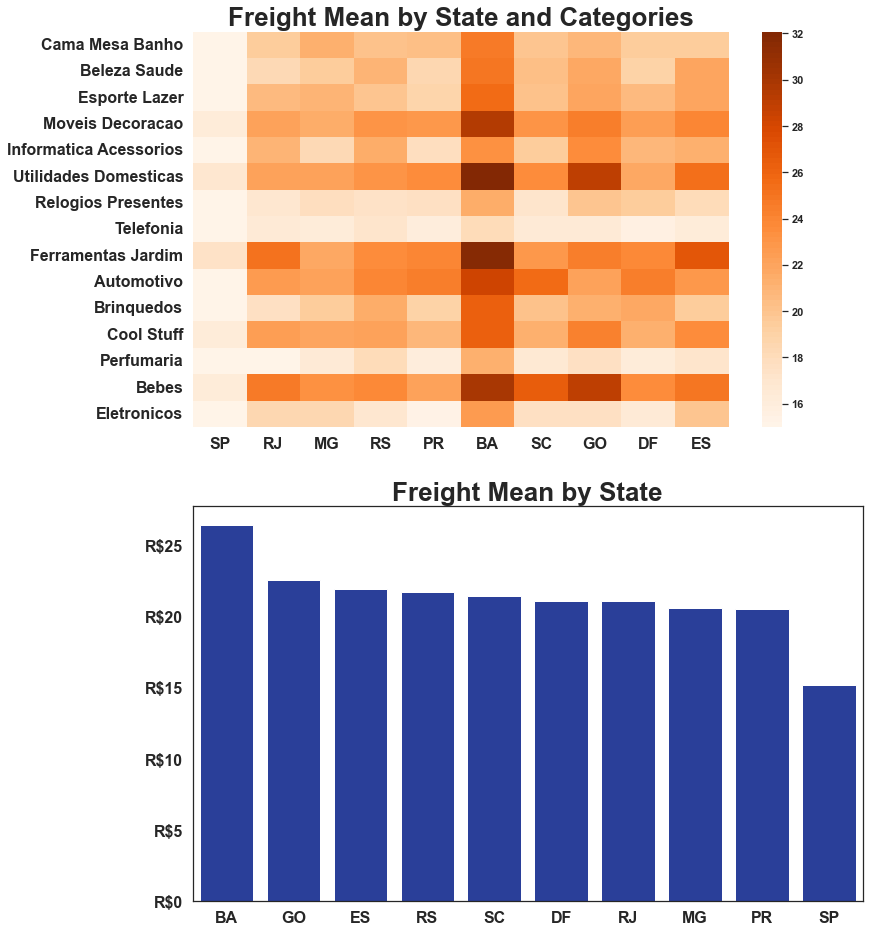

In [19]:

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,16))

colormap = sns.color_palette("Oranges",75)
sns.heatmap(cat_state_freight_gp,cmap=colormap,vmin =15, ax = ax1)

ax1.set_title('Freight Mean by State and Categories',fontsize = 26)
ax1.set_ylabel("",fontsize=16)
ax1.set_xlabel("",fontsize=16)
ax1.tick_params(labelsize=16)


sellers_summary_final.sort_values(by =['sales_revenue_percent'],ascending = False,inplace = True)
sellers_summary_final.reset_index(drop=True, inplace = True)
sns.barplot(y = 'freight_value',
            x = 'seller_state',
            data = sellers_summary_final[0:10].sort_values(by=['freight_value'],ascending = False),
            color='#1833ab',
            ax =ax2)

ax2.set_title('Freight Mean by State',fontsize = 26)
ax2.set_ylabel("",fontsize=16)
ax2.set_xlabel("",fontsize=16)
ax2.tick_params(labelsize=16) 
ax2.yaxis.set_major_formatter(r_formatter)
plt.show()

Freight may have some influence on order quantity, but it doesn't seem to be the most important factor,because freight will be more expensive in places that have less sellers.

We observed that most states in top 10 biggest revenues have a similar freight, with the exception of BA and SP. which makes sense since SP has a total of 59.74% of all sellers while BA has only 0.61% 

Anyway, it seems like a good idea to try to reduce the cost of freight in some categories and states that are especially above average, for exemple the category "Bebes" in GO and BA


Now, in order to understand the main differences between sales in different states and possibly which categories have the greatest potential to generate revenue, we will take a look in the most ordered categories by state


In [20]:
#adapting our summary for better vizualization (order quantity by categories and states)

category_summary3 = category_summary2.copy()
category_summary3.sort_values(by=['SP'],ascending = False, inplace = True)
cat_state_orders = category_summary3.drop(['price', 'freight_value',
                                                 'payment_installments', 'payment_value','credit_card',
                                                 'boleto', 'voucher','order_id', 'debit_card'],axis = 1)


#renaming categories
cat_state_orders['product_category_name'] = [
    re.sub('_',' ',i).title() for i in cat_state_orders['product_category_name']]

cat_state_orders.set_index('product_category_name',inplace = True)
cat_state_orders = cat_state_orders[0:15]


#top 10 states
top_10 = [i for i in state_df[0:6].customer_state]

cat_state_orders = cat_state_orders.loc[:,top_10]
cat_state_orders.drop('SP',axis = 1, inplace = True)
cat_state_orders.head()

,RJ,MG,RS,PR,BA
product_category_name,,,,,
Cama Mesa Banho,1744,1393,662,477,268
Beleza Saude,1061,1084,436,422,384
Esporte Lazer,1058,980,484,480,300
Moveis Decoracao,1114,990,570,526,263
Utilidades Domesticas,899,860,442,365,168


In [21]:
#adapting our summary for better vizualization (Total Revenue by categories and states)

cat_state_revenue = eda_df_resumed3.copy()

#creating one columns for each state
for state in eda_df_resumed2.customer_state.unique():
    cat_state_revenue[state] = [
        price if i == state else 0 for i,price in zip(eda_df_resumed2.customer_state,eda_df_resumed2.price)]
    
cat_state_revenue.drop(['order_id','freight_value', 'payment_type', 'payment_installments',
                        'payment_value',  'shipping_limit_date','credit_card', 'boleto','price',
                        'voucher', 'debit_card','customer_state'],axis = 1, inplace = True)

#grouping by category
cat_state_revenue_gp = cat_state_revenue.groupby('product_category_name',as_index = False).sum()
cat_state_revenue_gp.sort_values(by=['SP'],ascending = False, inplace = True)
cat_state_revenue_gp['product_category_name'] = [
    re.sub('_',' ',i).title() for i in cat_state_revenue_gp['product_category_name']]

cat_state_revenue_gp.set_index('product_category_name',inplace = True)
cat_state_revenue_gp = cat_state_revenue_gp.loc[:,top_10]
cat_state_revenue_gp = cat_state_revenue_gp.iloc[0:15]
cat_state_revenue_gp.drop('SP',axis =1,inplace = True)
cat_state_revenue_gp.head()

,RJ,MG,RS,PR,BA
product_category_name,,,,,
Cama Mesa Banho,156383.51,135871.07,62690.35,46821.71,26071.56
Beleza Saude,142695.34,156218.66,54936.33,54495.68,54874.80
Relogios Presentes,177732.23,126355.40,50476.58,59467.84,48217.42
Esporte Lazer,129723.27,112880.67,52655.63,57886.15,38397.59
Informatica Acessorios,119699.65,112596.73,62854.38,44274.25,33769.95



The categories are sorted by the most ordered and biggest revenues in SP



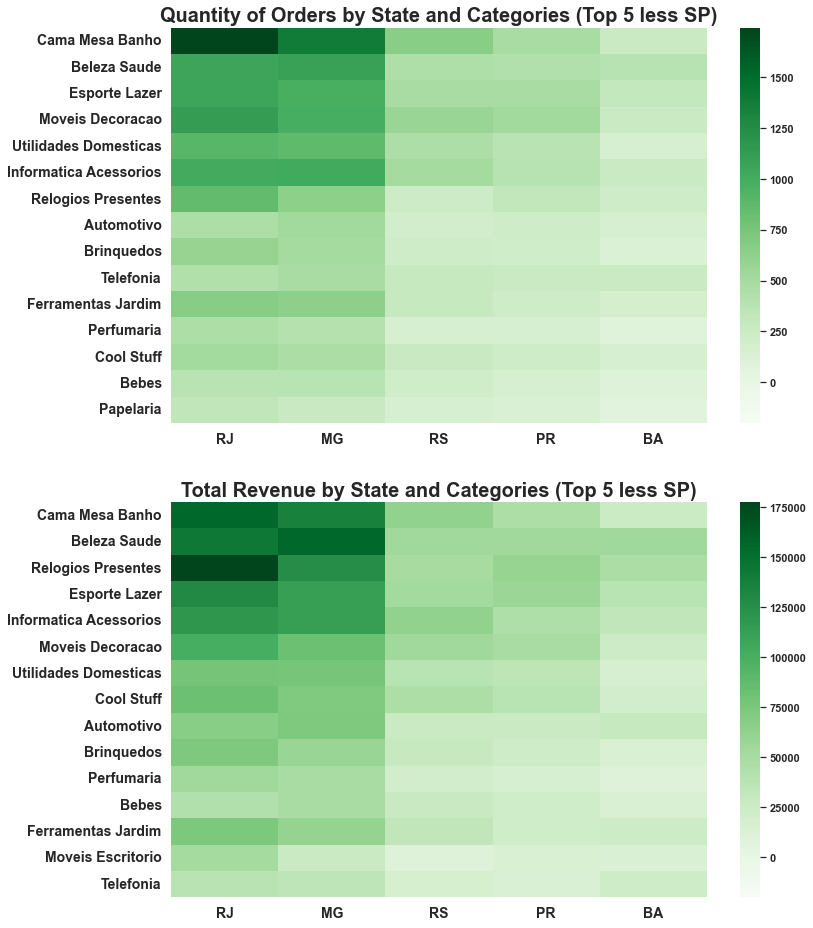

In [22]:
#viewing the data

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,16))

colormap2 = sns.color_palette("Greens",200)
sns.heatmap(cat_state_orders,cmap=colormap2,vmin =-200, ax = ax1)

ax1.set_title('Quantity of Orders by State and Categories (Top 5 less SP)',fontsize = 20)
ax1.set_ylabel("",fontsize=18)
ax1.set_xlabel("",fontsize=18)
ax1.tick_params(labelsize=14)


sns.heatmap(cat_state_revenue_gp,cmap=colormap2,vmin =-20000, ax = ax2)

ax2.set_title('Total Revenue by State and Categories (Top 5 less SP)',fontsize = 20)
ax2.set_ylabel("",fontsize=18)
ax2.set_xlabel("",fontsize=18)
ax2.tick_params(labelsize=14)

print('\nThe categories are sorted by the most ordered and biggest revenues in SP\n')
plt.show()




lets take a closer look in the most ordered categories by states
We are going to consider the top four states in order quantity



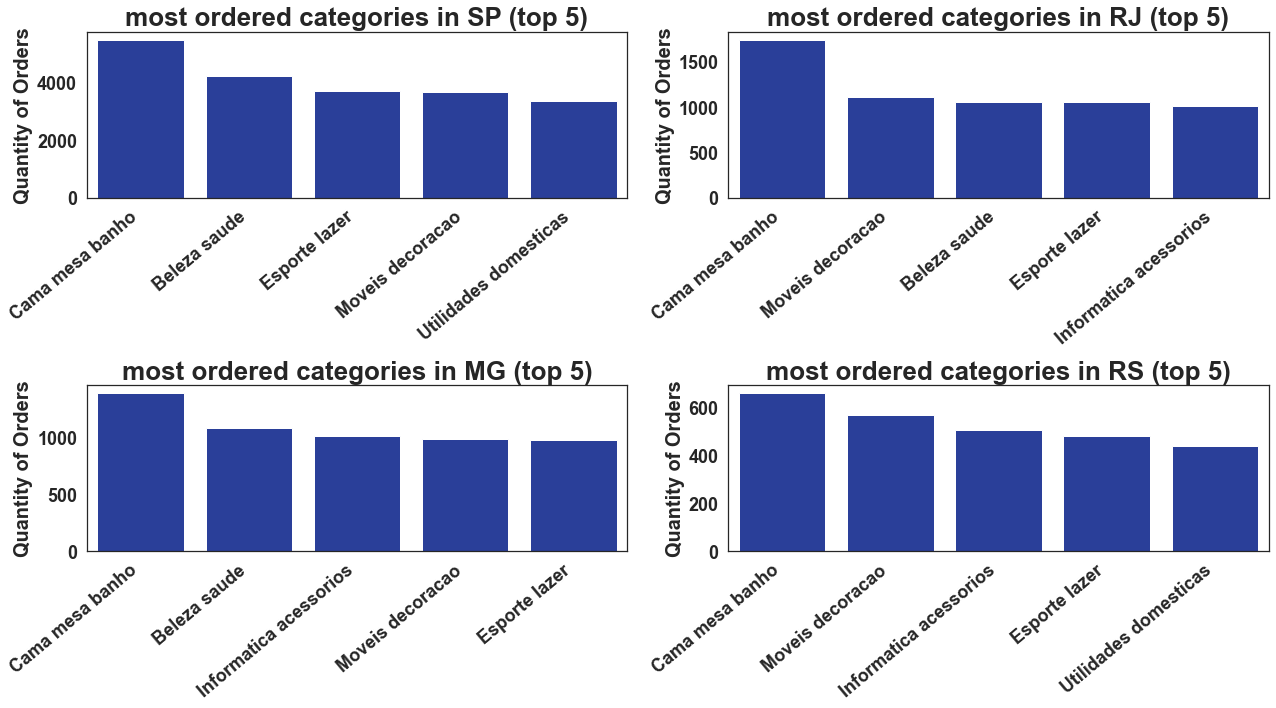

In [23]:
#a diferent view for the same info

print('\n\nlets take a closer look in the most ordered categories by states' 
      '\nWe are going to consider the top four states in order quantity\n')

states_df = category_summary2.copy()
states_list = state_df.customer_state[0:4]


fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(18,10))

########### SP
states_df.sort_values(by=[states_list[0]],ascending = False, inplace = True)
states_df.reset_index(drop=True, inplace=True)
categories_names = [re.sub('_',' ',i).capitalize() for i in states_df.product_category_name[0:5] ]
sns.barplot(x =categories_names,
            y = states_df[states_list[0]][0:5],color ='#1833ab',ax =ax1)
title = 'most ordered categories in ' + states_list[0] +' (top 5)'
ax1.set_title(title,fontsize = 26)
ax1.set_ylabel("Quantity of Orders",fontsize=20)
ax1.set_xlabel("",fontsize=20)
ax1.tick_params(labelsize=18)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

########### MG
states_df.sort_values(by=[states_list[1]],ascending = False, inplace = True)
states_df.reset_index(drop=True, inplace=True)
categories_names = [re.sub('_',' ',i).capitalize() for i in states_df.product_category_name[0:5] ]
sns.barplot(x =categories_names,
            y = states_df[states_list[1]][0:5],color ='#1833ab',ax =ax2)
title = 'most ordered categories in ' + states_list[1] +' (top 5)'
ax2.set_title(title,fontsize = 26)
ax2.set_ylabel("Quantity of Orders",fontsize=20)
ax2.set_xlabel("",fontsize=20)
ax2.tick_params(labelsize=18)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

########### PR
states_df.sort_values(by=[states_list[2]],ascending = False, inplace = True)
states_df.reset_index(drop=True, inplace=True)
categories_names = [re.sub('_',' ',i).capitalize() for i in states_df.product_category_name[0:5] ]
sns.barplot(x =categories_names,
            y = states_df[states_list[2]][0:5],color ='#1833ab',ax =ax3)
title = 'most ordered categories in ' + states_list[2] +' (top 5)'
ax3.set_title(title,fontsize = 26)
ax3.set_ylabel("Quantity of Orders",fontsize=20)
ax3.set_xlabel("",fontsize=20)
ax3.tick_params(labelsize=18)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")

########### RJ
states_df.sort_values(by=[states_list[3]],ascending = False, inplace = True)
states_df.reset_index(drop=True, inplace=True)
categories_names = [re.sub('_',' ',i).capitalize() for i in states_df.product_category_name[0:5] ]
sns.barplot(x =categories_names,
            y = states_df[states_list[3]][0:5],color ='#1833ab',ax =ax4)
title = 'most ordered categories in ' + states_list[3] +' (top 5)'
ax4.set_title(title,fontsize = 26)
ax4.set_ylabel("Quantity of Orders",fontsize=20)
ax4.set_xlabel("",fontsize=20)
ax4.tick_params(labelsize=18)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()



We still need to analyse if the distribution of vouchers is a good strategy and if vouchers are used equally in any category or people tend to use vouchers in specific categories. 

therefore, now we are going to create a payment method summary to answer those questions.


In [24]:
payment_summary = category_summary2.copy()
payment_summary = payment_summary.iloc[:,:10]

payment_summary['voucher_percentage'] = payment_summary.apply(
    lambda x: round(x.voucher*100/x.order_id,2),axis =1)

payment_summary.sort_values(by=['order_id'],ascending = False,inplace= True)
payment_summary['top_ten_ordered'] = [
    'In Top 10 Most Ordered Categories' if n<10 else 
    'NOT In Top 10 Most Ordered Categories' for n in range(len(payment_summary))]

payment_summary.sort_values(by=['voucher_percentage'],ascending = False,inplace= True)
payment_summary.reset_index(drop=True,inplace = True)
payment_summary.head()

,product_category_name,price,freight_value,payment_installments,payment_value,order_id,credit_card,boleto,voucher,debit_card,voucher_percentage,top_ten_ordered
0,agro_industria_e_comercio,81877.58,6760.42,2.934959,470.049756,246,141,58,42,5,17.07,NOT In Top 10 Most Ordered Categories
1,moveis_quarto,20948.70,5199.38,2.823529,252.581765,119,71,29,18,1,15.13,NOT In Top 10 Most Ordered Categories
2,la_cuisine,2303.98,386.89,4.250000,182.095625,16,13,1,2,0,12.50,NOT In Top 10 Most Ordered Categories
3,eletrodomesticos_2,117901.52,12031.66,4.038314,455.379540,261,179,45,31,6,11.88,NOT In Top 10 Most Ordered Categories
4,fashion_roupa_masculina,11286.12,2252.81,2.586957,121.184493,138,97,24,16,1,11.59,NOT In Top 10 Most Ordered Categories


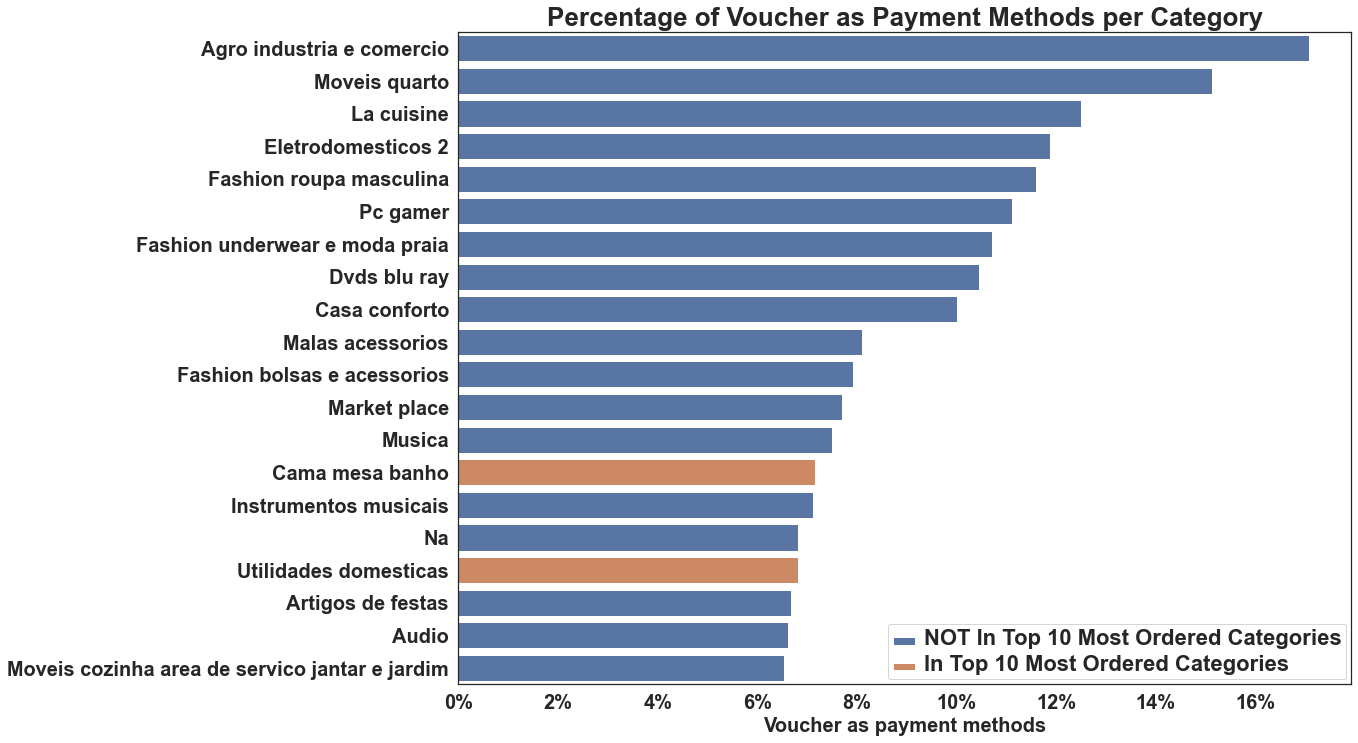

In [25]:
fig, (ax1) = plt.subplots(1,1,figsize=(16,12))

payment_summary['product_category_name'] = [
    re.sub('_',' ',i).capitalize() for i in payment_summary['product_category_name']]

sns.barplot(y = 'product_category_name',
            x = 'voucher_percentage',
            data = payment_summary[0:20],
            hue = 'top_ten_ordered',
            dodge = False,
            ax =ax1)

ax1.legend()
ax1.set_title('Percentage of Voucher as Payment Methods per Category',fontsize = 26)
ax1.set_ylabel("",fontsize=20)
ax1.set_xlabel("Voucher as payment methods",fontsize=20)
ax1.tick_params(labelsize=20)
plt.setp(ax1.get_legend().get_texts(), fontsize='22') 
ax1.xaxis.set_major_formatter(p_formatter)
plt.show()


Insights:

First, we note that our sellers are heavily concentrated in the state of SP (aprox 70%) and although this state is also the leader in sales (37%) the values indicate that the other states depend on the sellers of SP. Thus, if we want to think of strategies to increase sales in other states (or even better, in other regions), a good one is to increase the number of sellers in other states, because even though states around sp (RJ,MG,PR, RS) have a good representation in total revenue, the further away we are from SP, the fewer purchases we have. Therefore, we should think about our strategies at the state\region level.

BA seens to be the perfect state to start with some investment. It is a state far from SP, it has much higher freight rates than the average, and yet, it occupies the sixth place among the states with the highest revenue. This shows that investments in this state have the potential to offer a high return, both because it is a state that already has good engagement, and because it is a state far from SP with only 0.61% of total sellers. This should promote sales in the state and maybe in the entire region.

Our analysis in relation to the sales categories allows us to indicates which type of product is interesting to encourage in each state. For example, we see that the categorie "Cama Mesa Banho" ("Towels Tablecloth") is a sales leader in SP and RJ, but not in BA, which indicates that it would be interesting to bring sellers of this category to the state. another example is the watch category, which is the leader in revenue in RJ, but not in SP, which indicates that it may be interesting to invest in the watch category in SP.
    
Beside that, it is worth thinking about other forms of incentive other than the distribution of vouchers, because the categories with the highest percentages of voucher usage are not those with the highest revenue value. 


# Temporal Analysis

In this section we will explore our data  with a temporal bias, in order to try to answer the following questions:


*How are the sales growth/falling trends (nationally and statewide)?

*How are the sales growth/falling trends in each category?

*What kind of strategies can we establish from this trend analysis?

In [26]:
#Let's start by understanding the time range of our data 

temporal_eda = eda_df_resumed2.copy()
temporal_eda['year'] = [int(re.findall('\d{4}',i)[0]) for i in eda_df_resumed2.shipping_limit_date]
temporal_eda['month'] = [int(re.findall('\d{4}-(\d{2})',i)[0]) for i in eda_df_resumed2.shipping_limit_date]

print(f'we have data from years: {temporal_eda.year.unique()}' 
      '\n\nits weird that we have records from 2020 but not from 2019, lets look at records from 2020:')

display(temporal_eda[temporal_eda.year ==2020])
print('\nwe only have 2 records for 2020, so it appears to be some kind of error, we will drop those values.\n')

temporal_eda = temporal_eda[temporal_eda.year !=2020].reset_index(drop=True)

we have data from years: [2017 2018 2016 2020]

its weird that we have records from 2020 but not from 2019, lets look at records from 2020:


,order_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_state,shipping_limit_date,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_state,year,month
87586,c2bb89b5c1dd978d507284be78a04cb2,utilidades_domesticas,99.99,61.44,credit_card,15.0,322.86,MG,2020-04-09 22:35:08,delivered,2017-05-23 22:28:36,2017-06-09 13:35:54,44b6bbfea26596437062a38c8e6bcec1,SP,2020,4
87587,c2bb89b5c1dd978d507284be78a04cb2,utilidades_domesticas,99.99,61.44,credit_card,15.0,322.86,MG,2020-04-09 22:35:08,delivered,2017-05-23 22:28:36,2017-06-09 13:35:54,44b6bbfea26596437062a38c8e6bcec1,SP,2020,4



we only have 2 records for 2020, so it appears to be some kind of error, we will drop those values.



In [27]:
#adapting the dataframe for temporal analysis
temporal_eda['shipping_limit_date'] = pd.to_datetime(temporal_eda['shipping_limit_date'], format="%Y/%m/%d")
temporal_eda['order_purchase_timestamp'] = pd.to_datetime(temporal_eda['order_purchase_timestamp'], format="%Y/%m/%d")
temporal_eda['order_delivered_customer_date'] = pd.to_datetime(temporal_eda['order_delivered_customer_date'], format="%Y/%m/%d")
temporal_eda

,order_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_state,shipping_limit_date,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_state,year,month
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.90,13.29,credit_card,2.0,72.19,SP,2017-09-19 09:45:35,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,RJ,2017,9
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,239.90,19.93,credit_card,3.0,259.83,SP,2017-05-03 11:05:13,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,SP,2017,5
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao,199.00,17.87,credit_card,5.0,216.87,MG,2018-01-18 14:48:30,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,MG,2018,1
3,00024acbcdf0a6daa1e931b038114c75,perfumaria,12.99,12.79,credit_card,2.0,25.78,SP,2018-08-15 10:10:18,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,SP,2018,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim,199.90,18.14,credit_card,3.0,218.04,PR,2017-02-13 13:57:51,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,SP,2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115028,fffc94f6ce00a00581880bf54a75a037,utilidades_domesticas,299.99,43.41,boleto,1.0,343.40,SC,2018-05-02 04:11:01,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,0c9aeda10a71f369396d0c04dce13a64,MA,2018,5
115029,fffcd46ef2263f404302a634eb57f7eb,informatica_acessorios,350.00,36.53,boleto,1.0,386.53,SP,2018-07-20 04:31:48,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,0da9fe112eae0c74d3ba1fe16de0988b,PR,2018,7
115030,fffce4705a9662cd70adb13d4a31832d,esporte_lazer,99.90,16.95,credit_card,3.0,116.85,PR,2017-10-30 17:14:25,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,cd79b407828f02fdbba457111c38e4c4,SP,2017,10
115031,fffe18544ffabc95dfada21779c9644f,informatica_acessorios,55.99,8.72,credit_card,3.0,64.71,SP,2017-08-21 00:04:32,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,eb803377c9315b564bdedad672039306,SP,2017,8


In [28]:
#Let's take a closer look at the time range of our data

for year in range(2016,2019):
    print(f'Quantity of records for de year {year}: {len(temporal_eda[temporal_eda.year ==year])}')
    
print(f'\n\nOldest registered purchase: {min(temporal_eda.order_purchase_timestamp)}'
      f'\nMost recent purchase registered: {max(temporal_eda.order_purchase_timestamp)}')
    

Quantity of records for de year 2016: 331
Quantity of records for de year 2017: 51025
Quantity of records for de year 2018: 63677


Oldest registered purchase: 2016-10-03 09:44:50
Most recent purchase registered: 2018-08-29 15:00:37


In [29]:
#Let's take an overview of our sales trends

day_temporal_eda = temporal_eda.groupby(pd.Grouper(key="order_purchase_timestamp", freq="D")).agg({'order_id':'count',
                                                                                                   'payment_value':'sum'})

day_temporal_eda.rename(columns = {'order_id': 'qnt_orders',
                                   'payment_value': 'total_revenue'}, inplace = True)

day_temporal_eda.head()

,qnt_orders,total_revenue
order_purchase_timestamp,,
2016-10-03,7,559.53
2016-10-04,70,11982.08
2016-10-05,51,13124.66
2016-10-06,47,8323.57
2016-10-07,45,8668.50


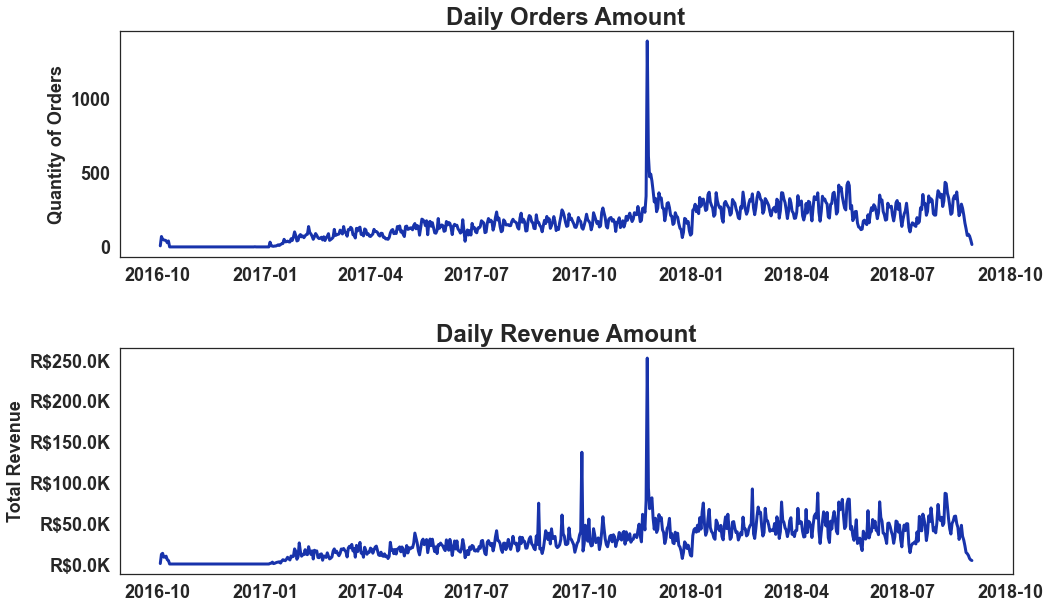

In [30]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,10))

sns.set_style("white")
sns.lineplot(y=day_temporal_eda.qnt_orders,
            x=day_temporal_eda.index,
            color ='#1833ab',lw =3, ax = ax1)

ax1.set_title("Daily Orders Amount",fontsize = 24)
ax1.set_xlabel("",fontsize=18)
ax1.set_ylabel("Quantity of Orders",fontsize=18)
ax1.tick_params(labelsize=18)

sns.lineplot(y=day_temporal_eda.total_revenue,
            x=day_temporal_eda.index,
            color ='#1833ab',lw =3, ax = ax2)

ax2.set_title("Daily Revenue Amount",fontsize = 24)
ax2.set_xlabel("",fontsize=18)
ax2.set_ylabel("Total Revenue",fontsize=18)
ax2.yaxis.set_major_formatter(t_formatter)
ax2.tick_params(labelsize=18)
plt.subplots_adjust(hspace = 0.4)
plt.show()

We can observe some interesting things in these visualizations.

    First: We notice that we have incomplete records in 2016, with only a few records in month 10 and none in months 11 and 12.This can be a potential problem for the entire DataFrame, and needs to be checked with the responsible area. However, as this is an educational project, we will only confirm that the data is incomplete, exclude them, and proceed with our analysis.
    
    Second: We can see some interesting sales peaks that should be further investigated.
    
Its also nice to note a general growth trend, which can be taken as a positive feedback.

In [31]:
# Checking if we really have incomplete records in 2016

print(f'\nQuantity of records for de year 2016: {len(temporal_eda[temporal_eda.year ==2016])}'
      f'\nQuantity of records for de year 2016 in Month 10: '
      f'{len(temporal_eda[(temporal_eda.year ==2016) & (temporal_eda.month ==10)])}'
      f'\nQuantity of records for de year 2016 NOT in Month 10: '
      f'{len(temporal_eda[(temporal_eda.year ==2016) & (temporal_eda.month !=10)])}')

print('\nLets look at the record for de year 2016 that isent in Month 10:')
display(temporal_eda[(temporal_eda.year ==2016) & (temporal_eda.month !=10)])

print('\nIts a purchase from 2016-12-23, so its clear that we have missing records between months 10 and 12 of 2016' 
      '\nAs said above, we will drop records from 2016')

#droping 2016 records
temporal_eda2=temporal_eda[temporal_eda.year!=2016]
temporal_eda2.reset_index(drop = True, inplace = True)


Quantity of records for de year 2016: 331
Quantity of records for de year 2016 in Month 10: 330
Quantity of records for de year 2016 NOT in Month 10: 1

Lets look at the record for de year 2016 that isent in Month 10:


,order_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_state,shipping_limit_date,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_state,year,month
85158,bd50a7fe9fd97ea4b7663031a319e150,fashion_bolsas_e_acessorios,10.9,8.72,credit_card,1.0,19.62,PR,2016-12-27 23:16:47,delivered,2016-12-23 23:16:47,2016-12-28 15:54:44,f7b981e8a280e455ac3cbe0d5d171bd1,PR,2016,12



Its a purchase from 2016-12-23, so its clear that we have missing records between months 10 and 12 of 2016
As said above, we will drop records from 2016


In [32]:
#Analysing sales peaks:

#Droping 2016
day_temporal_eda2 = day_temporal_eda[day_temporal_eda.index.year!=2016]

day_temporal_eda_peaks = day_temporal_eda2.sort_values(by = ['qnt_orders'], ascending = False)[0:5]
print('\nTop Orders Dates')
display(day_temporal_eda_peaks)

day_temporal_eda_peaks = day_temporal_eda2.sort_values(by = ['total_revenue'], ascending = False)[0:5]
print('\nTop Revenue Dates')
display(day_temporal_eda_peaks)


Top Orders Dates


,qnt_orders,total_revenue
order_purchase_timestamp,,
2017-11-24,1386,252641.82
2017-11-25,610,93048.66
2017-11-27,490,78624.97
2017-11-26,472,67838.55
2017-11-28,444,81194.86



Top Revenue Dates


,qnt_orders,total_revenue
order_purchase_timestamp,,
2017-11-24,1386,252641.82
2017-09-29,129,137132.52
2017-11-25,610,93048.66
2018-02-22,357,92110.99
2018-04-19,364,87141.73


the biggest peak stands for the black friday in 2017. Unfortunately we don't have data for november 2018, for comparison. So all we can say is that the black friday campaign in 2017 appears to have been a success.

We also have a big peak in 2017-09-29. It is worth noting that here, we have a peak only in revenue, not in the number of orders. In a quick analysis it was not possible to identify a pattern such as a holiday responsible for the sales of the date. But it is certainly an interesting topic to raise together with the responsible team.

In [33]:
#Let's start our temporal analysis by states

week_temporal_eda = temporal_eda2.groupby([pd.Grouper(key='order_purchase_timestamp', freq="1W"),
                                           pd.Grouper('customer_state')]).agg({'order_id':'count','payment_value':'sum'})

week_temporal_eda.rename(columns = {'order_id': 'qnt_orders','payment_value': 'total_revenue'}, inplace = True)
week_temporal_eda.reset_index(inplace = True)

#It is not worth keeping information about all states, since most of them have sales close to zero
#from our explonatory analysis we can recovery the top 10 states in total revenue:
state_df.sort_values(by=['sales_revenue_percent'],ascending = False,inplace=True)
top_6 = [i for i in state_df[0:6].customer_state]

#Keeping only most relevant states (by total revenues):
week_temporal_eda = week_temporal_eda[week_temporal_eda.customer_state.isin(top_6)]
week_temporal_eda.reset_index(drop=True, inplace = True)
week_temporal_eda[510:520]

,order_purchase_timestamp,customer_state,qnt_orders,total_revenue
510,2018-08-26,MG,137,20453.07
511,2018-08-26,PR,56,5798.77
512,2018-08-26,RJ,128,19840.87
513,2018-08-26,RS,42,7301.46
514,2018-08-26,SP,730,94432.02
515,2018-09-02,MG,3,329.99
516,2018-09-02,PR,5,1488.66
517,2018-09-02,RJ,6,561.02
518,2018-09-02,RS,2,185.48
519,2018-09-02,SP,119,13389.47


In [34]:
#we can note that the last week has incomplete data, so we will drop it 
week_temporal_eda = week_temporal_eda[:515]
week_temporal_eda.tail()

,order_purchase_timestamp,customer_state,qnt_orders,total_revenue
510,2018-08-26,MG,137,20453.07
511,2018-08-26,PR,56,5798.77
512,2018-08-26,RJ,128,19840.87
513,2018-08-26,RS,42,7301.46
514,2018-08-26,SP,730,94432.02


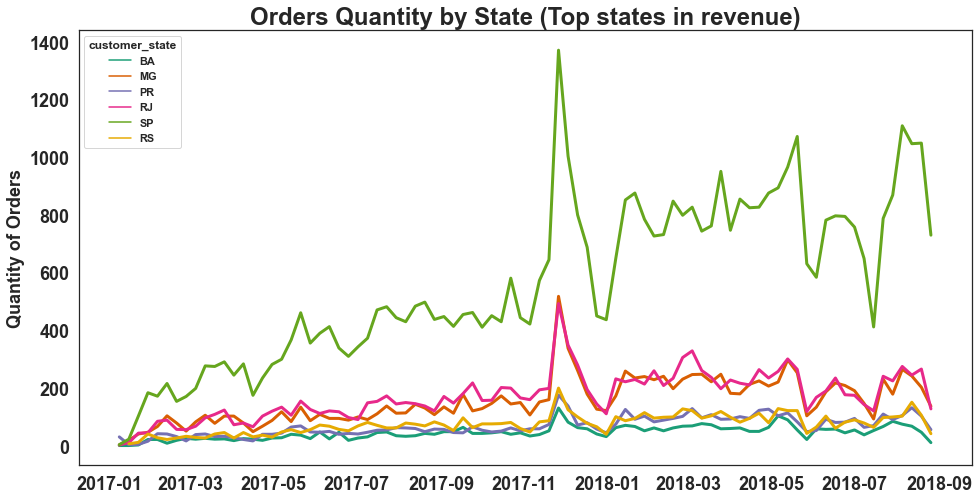

In [35]:
fig1, ax1 = plt.subplots(figsize=(16,8))

sns.set_style("white")
sns.lineplot(y=week_temporal_eda.qnt_orders,
             x=week_temporal_eda.order_purchase_timestamp,
             hue = week_temporal_eda.customer_state,lw =3, palette = 'Dark2',ax = ax1)

ax1.set_title("Orders Quantity by State (Top states in revenue)",fontsize = 24)
ax1.set_xlabel("",fontsize=18)
ax1.set_ylabel("Quantity of Orders",fontsize=18)
ax1.tick_params(labelsize=18)

plt.show()

It's a little difficult to get any kind of insight from this chart. Therefore, we will adapt the data to a polynomial function, so that the trends in each state are clearer.

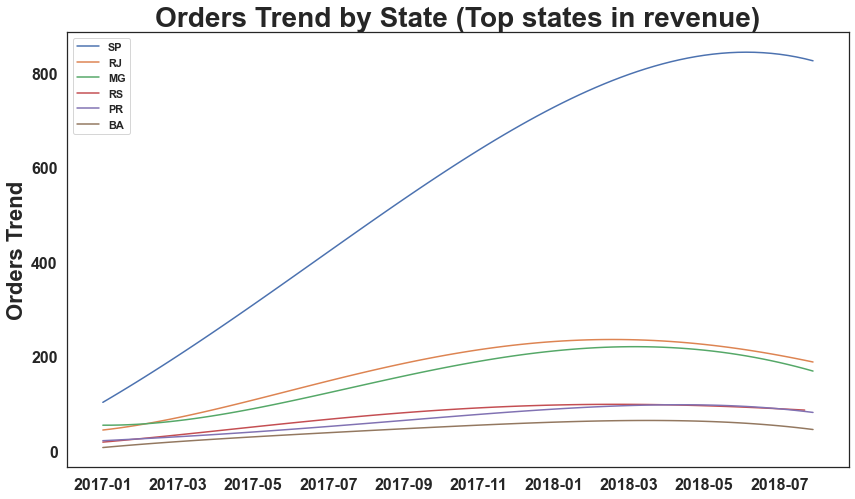

In [36]:
#Creating a fourth degree polynomial function for the orders quantity in each state, and adding to a plot

plt.figure(figsize=(14,8))
for state in top_6:
    eq_data = week_temporal_eda[week_temporal_eda.customer_state == state].qnt_orders
    x = np.arange(0,len(eq_data))
    y = np.array(eq_data)
    z = np.polyfit(x,y,4)
    func = np.poly1d(z)
    plt.plot(x,func(x))
    
labels = [re.findall('\d{4}-\d{2}',str(i))[0] for i in week_temporal_eda.order_purchase_timestamp.unique()]

plt.legend(top_6)
plt.xticks(x, labels,fontsize=16)
plt.yticks(fontsize=16)
plt.locator_params(axis='x', nbins=10)
plt.xlabel('',fontsize = 40) #caracteristica das labels 
plt.ylabel('Orders Trend',fontsize = 22)
plt.title('Orders Trend by State (Top states in revenue)',fontsize = 28)
plt.show()

We can see that the state of SP had a growth well above average, which in itself is an insight. However, the difference is so big that it ends up distorting the graph, making it difficult to see other states. So, before taking any conclusions, let's generate the same visualization without the SP state.

fourth degree polynomial function


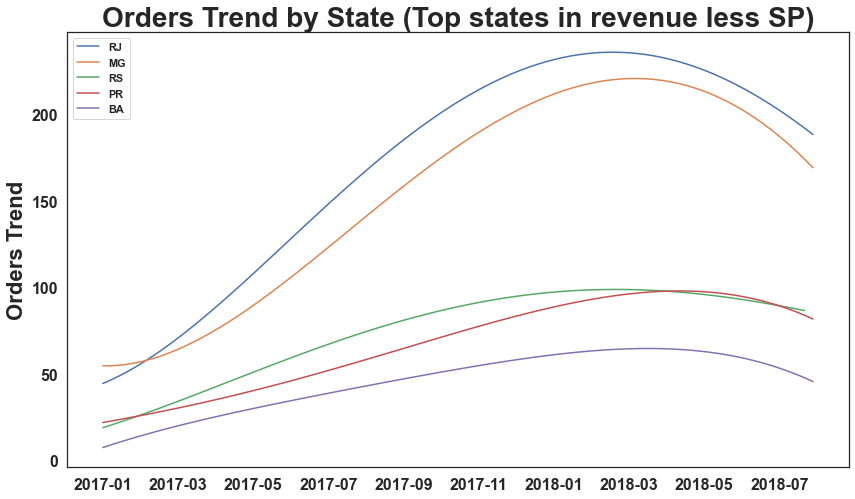

In [37]:
#Creating the same viz without SP state

top_6_less_sp = top_6.copy()
top_6_less_sp.remove('SP')

plt.figure(figsize=(14,8))
for state in top_6_less_sp:
    eq_data = week_temporal_eda[week_temporal_eda.customer_state == state].qnt_orders
    x = np.arange(0,len(eq_data))
    y = np.array(eq_data)
    z = np.polyfit(x,y,4)
    func = np.poly1d(z)
    plt.plot(x,func(x))

    
labels = [re.findall('\d{4}-\d{2}',str(i))[0] for i in week_temporal_eda.order_purchase_timestamp.unique()]

plt.legend(top_6_less_sp)
plt.xticks(x, labels,fontsize=16)
plt.yticks(fontsize=16)
plt.locator_params(axis='x', nbins=10)
plt.xlabel('',fontsize = 40) #caracteristica das labels 
plt.ylabel('Orders Trend',fontsize = 22)
plt.title('Orders Trend by State (Top states in revenue less SP)',fontsize = 28)
print('fourth degree polynomial function')
plt.show()

With this view, it became clear a strong growth in 2017 until the middle of 2018 in the states of RJ and MG, and a slight growth in the rest in the same period. However, in the last months in which there are records (2018/05 -2018/08), we have seen the beginning of a worrying downward trend.

Lets analyse the growth month by month to view it in another perspective

In [38]:
#Monthly DataFrame

month_temporal_eda = temporal_eda2.groupby([pd.Grouper(key='order_purchase_timestamp', freq="1M"),
                                           pd.Grouper('customer_state')]).agg({'order_id':'count','payment_value':'sum'})

month_temporal_eda.rename(columns = {'order_id': 'qnt_orders','payment_value': 'total_revenue'}, inplace = True)
month_temporal_eda.reset_index(inplace = True)

#from our explonatory analysis we can recovery the top 10 states in total revenue:
state_df.sort_values(by=['sales_revenue_percent'],ascending = False,inplace=True)
top_6 = [i for i in state_df[0:6].customer_state]

#Keeping only most relevant states (by total revenues):
month_temporal_eda = month_temporal_eda[month_temporal_eda.customer_state.isin(top_6)]
month_temporal_eda.reset_index(drop=True, inplace = True)
month_temporal_eda.head(7)

,order_purchase_timestamp,customer_state,qnt_orders,total_revenue
0,2017-01-31,BA,30,4967.65
1,2017-01-31,MG,133,25917.09
2,2017-01-31,PR,67,7503.88
3,2017-01-31,RJ,123,16267.25
4,2017-01-31,RS,65,15056.00
5,2017-01-31,SP,370,63989.58
6,2017-02-28,BA,75,9750.97


In [39]:
#Last month revenue
month_temporal_eda2 = month_temporal_eda.copy()
month_temporal_eda2['last_month_revenue'] = month_temporal_eda2.groupby('customer_state').total_revenue.shift(1)

month_temporal_eda2['revenue_growth_last_m'] = (
    100*month_temporal_eda2.total_revenue/month_temporal_eda2.last_month_revenue)-100
month_temporal_eda2

,order_purchase_timestamp,customer_state,qnt_orders,total_revenue,last_month_revenue,revenue_growth_last_m
0,2017-01-31,BA,30,4967.65,NaN,NaN
1,2017-01-31,MG,133,25917.09,NaN,NaN
2,2017-01-31,PR,67,7503.88,NaN,NaN
3,2017-01-31,RJ,123,16267.25,NaN,NaN
4,2017-01-31,RS,65,15056.00,NaN,NaN
...,...,...,...,...,...,...
115,2018-08-31,MG,784,132464.30,129369.82,2.391964
116,2018-08-31,PR,379,54692.78,66134.54,-17.300733
117,2018-08-31,RJ,821,125942.07,147865.80,-14.826775
118,2018-08-31,RS,372,87038.79,63277.41,37.551126


In [40]:
#three month moving average

month_temporal_eda3 = month_temporal_eda2.copy()

month_temporal_eda3['moving_average_3'] =(
    month_temporal_eda3.groupby('customer_state').total_revenue.shift(1) +
    month_temporal_eda3.groupby('customer_state').total_revenue.shift(2) +
    month_temporal_eda3.groupby('customer_state').total_revenue.shift(3))/3

#Droping nan (first months)
month_temporal_eda3.dropna(inplace = True)
month_temporal_eda3.reset_index(drop = True, inplace = True)


#growth compared to the average of last 3 months
month_temporal_eda3['revenue_growth_avg_3m'] = (
    100*month_temporal_eda3.total_revenue/month_temporal_eda3.moving_average_3)-100

month_temporal_eda3.head()

,order_purchase_timestamp,customer_state,qnt_orders,total_revenue,last_month_revenue,revenue_growth_last_m,moving_average_3,revenue_growth_avg_3m
0,2017-04-30,BA,98,24382.50,24102.43,1.161999,12940.350000,88.422261
1,2017-04-30,MG,312,58363.09,61904.83,-5.721266,43052.756667,35.561796
2,2017-04-30,PR,128,23495.14,20107.66,16.846714,18942.130000,24.036420
3,2017-04-30,RJ,386,72091.70,70698.10,1.971199,44770.393333,61.025389
4,2017-04-30,RS,147,21546.00,26850.71,-19.756312,20417.203333,5.528655


In [41]:
#Pivot table for heatmap viz (last month growth)

month_temporal_pivot = month_temporal_eda3.pivot(
    values = 'revenue_growth_last_m', index = 'order_purchase_timestamp', columns = 'customer_state')

#renaming timestamp 
month_temporal_pivot.index = month_temporal_pivot.index.month_name().str[:3]
month_temporal_pivot = month_temporal_pivot.transpose()
month_temporal_pivot.head()

order_purchase_timestamp,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
customer_state,,,,,,,,,,,,,,,,,
BA,1.161999,8.882846,17.931089,-19.830769,38.166813,-4.569394,0.385796,69.725090,-24.491936,29.174720,27.312017,-12.998267,-30.605737,34.938868,1.867233,-5.350386,-48.416220
MG,-5.721266,10.924833,-4.121385,28.869935,3.427379,35.700752,1.020553,99.138372,-42.421627,30.470629,-12.760647,7.720673,-0.920534,5.961121,-8.708810,-15.342121,2.391964
PR,16.846714,99.247717,-25.839367,0.482470,19.422922,-6.453260,25.051159,80.231313,-54.680227,107.177519,-25.926499,19.936486,44.283898,-34.723221,-14.898229,12.615760,-17.300733
RJ,1.971199,39.320990,-31.222235,62.667117,-3.190332,104.314186,-35.954415,60.185599,-31.439293,9.218726,-2.860186,5.835579,18.727774,-8.657718,-22.351050,0.029258,-14.826775
RS,-19.756312,77.089761,11.063520,-4.295218,16.366126,10.578130,39.286782,26.787810,-37.681342,15.579714,8.101244,9.840648,-10.905268,20.344591,-28.401947,4.574789,37.551126


In [42]:
#Pivot table for heatmap viz (growth compared to avg of last 3 months)

avg3m_temporal_pivot = month_temporal_eda3.pivot(
    values = 'revenue_growth_avg_3m', index = 'order_purchase_timestamp', columns = 'customer_state')

#renaming timestamp 
avg3m_temporal_pivot.index = avg3m_temporal_pivot.index.month_name().str[:3]
avg3m_temporal_pivot = avg3m_temporal_pivot.transpose()
avg3m_temporal_pivot.head()

order_purchase_timestamp,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
customer_state,,,,,,,,,,,,,,,,,
BA,88.422261,36.762856,25.179517,-8.438304,25.413705,8.998916,7.314761,67.491228,4.095841,24.820157,36.435272,9.045631,-31.793118,-1.201051,8.793850,4.810570,-49.978402
MG,35.561796,20.180909,0.651840,29.593555,20.017472,49.828376,23.728368,119.688912,-13.600201,8.457329,-15.509644,6.836122,-0.670281,7.894492,-5.438656,-18.836676,-11.607468
PR,24.036420,92.866139,15.191172,-0.353960,7.357761,5.081157,26.565333,103.688768,-31.970509,40.274648,-12.776956,19.871333,46.264362,-13.767176,-28.957358,-15.011009,-15.365496
RJ,61.025389,58.474564,-14.796710,39.526170,15.774415,129.741513,-3.691523,44.502411,-20.861437,-2.746849,-10.361270,6.832803,22.083265,3.873396,-22.785473,-18.846091,-22.267776
RS,5.528655,68.976320,46.883607,19.192930,16.924452,20.312144,55.831591,60.680290,-20.612335,-10.409782,-0.323359,20.906715,-2.897281,14.823659,-22.277491,-11.807259,25.356480


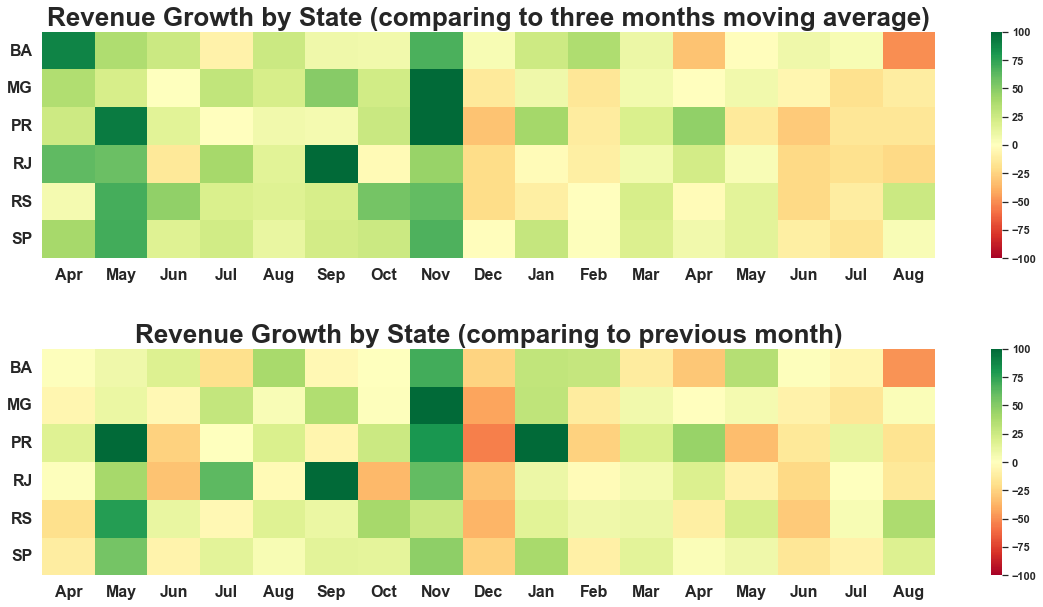

In [43]:

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,10))
colormap3 = sns.color_palette("RdYlGn",200)

sns.heatmap(avg3m_temporal_pivot,cmap=colormap3, vmin = -100, vmax = 100,ax = ax1)

ax1.set_title('Revenue Growth by State (comparing to three months moving average)',fontsize = 26)
ax1.set_ylabel("",fontsize=16)
ax1.set_xlabel("",fontsize=16)
ax1.tick_params(labelsize=16)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

sns.heatmap(month_temporal_pivot,cmap=colormap3,vmin = -100, vmax = 100,ax = ax2)

ax2.set_title('Revenue Growth by State (comparing to previous month)',fontsize = 26)
ax2.set_ylabel("",fontsize=16)
ax2.set_xlabel("",fontsize=16)
ax2.tick_params(labelsize=16)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
plt.subplots_adjust(hspace = 0.4)
plt.show()

The charts above definitely confirm our first impression of the trends, especially in the three-month moving average one. We note that until april 2017, green predominates in the graph (uptrend) with the exception of December, which was hampered by exceptional black friday sales in November. However, when we look at the last three months of record (Jun, Jul and Aug 2018)  we can see red predominating in the graph (downtrend).

So, as already noted, this means that in the last few months we have entered in a worrying downward trend.



Now we are going to analyse the sales evolution of our top ordered categories

In [115]:
#lets group our filered_temporal_df by week and category

categories_df = temporal_eda.copy()
categories_df = categories_df[categories_df.product_category_name!='NA']
categories_gb = categories_df.groupby([pd.Grouper(key="order_purchase_timestamp", freq="W"),
                                       pd.Grouper(key="product_category_name")]).agg({'order_id':'count',
                                                                                      'payment_value':'sum'})
#renaming and organazing
categories_gb.rename(columns = {'order_id': 'qnt_orders','payment_value': 'total_revenue'}, inplace = True)
categories_gb.reset_index(inplace = True)

#As noted before, the last week has incomplete data, so we will drop it 
categories_gb = categories_gb[categories_gb.order_purchase_timestamp != '2018-09-02']

categories_gb.tail()

,order_purchase_timestamp,product_category_name,qnt_orders,total_revenue
4336,2018-08-26,portateis_casa_forno_e_cafe,4,538.82
4337,2018-08-26,relogios_presentes,62,10092.38
4338,2018-08-26,sinalizacao_e_seguranca,3,390.59
4339,2018-08-26,telefonia,35,4072.58
4340,2018-08-26,utilidades_domesticas,108,15185.76


For our categories analysis we are going to take a different approach. First, we will collect data on the trend of each category in the last 3, 6 and 12 months. To define this trend value we will create linear regression lines for 3, 6 and 12 months. The trend will be the slope of the axis.

In [117]:
#to make our work easier let's create a column with a unique value for each month

def unique_month(df):
    if df.order_purchase_timestamp.year == 2016:
        unique_month = df.order_purchase_timestamp.month
    if df.order_purchase_timestamp.year == 2017:
        unique_month = df.order_purchase_timestamp.month +12
    if df.order_purchase_timestamp.year == 2018:
        unique_month = df.order_purchase_timestamp.month + 24
    df['unique_month'] = unique_month
    return df
    
categories_gb2 = categories_gb.copy()
categories_gb2 = categories_gb2.apply(unique_month,axis = 1)
categories_gb2.sample(5)

,order_purchase_timestamp,product_category_name,qnt_orders,total_revenue,unique_month
3742,2018-06-17,fashion_calcados,2,318.06,30
2520,2018-01-21,automotivo,82,14806.47,25
2336,2017-12-24,livros_importados,1,93.98,24
1375,2017-08-13,utilidades_domesticas,82,8138.09,20
725,2017-05-07,utilidades_domesticas,65,7457.82,17


In [155]:
#return a df with the category name and trend for the specified range 
#must enter with categories_gb2 or similar df as parameter

def get_categories_slope(df,qnt_months):
    max_month = max(df.unique_month.unique()) +1
    month_range = [i for i in range(max_month -qnt_months,max_month)]
    categories = df.product_category_name.unique()
    slope_list =[]
    direction_list =[] #positive or negative
    for category in categories:
        eq_data = df[(df.product_category_name ==category)& (df.unique_month.isin(month_range))].qnt_orders
        if len(eq_data) > 1:
            x = np.arange(0,len(eq_data))
            y = np.array(eq_data)
            z = np.polyfit(x,y,1)
            slope = z[0]
            slope_list.append(slope)
            f = lambda x: 1 if x>0 else 0 #positive = 1; negative = 0
            direction_list.append(f(slope))
        else:
            slope_list.append('NA')
            direction_list.append('NA')

    col_name = 'trend_' +str(qnt_months) + '_months'
    slope_df = pd.DataFrame({'product_category_name':categories,
                             col_name:slope_list,
                             'direction':direction_list})
    slope_df = slope_df[slope_df.direction !='NA']
    return slope_df
    

In [156]:
months3_trend = get_categories_slope(categories_gb2,3)
months6_trend = get_categories_slope(categories_gb2,6)
months12_trend = get_categories_slope(categories_gb2,12)

months12_trend.sample(5)

,product_category_name,trend_12_months,direction
50,eletrodomesticos,0.378878,1
46,pcs,-0.326932,0
18,informatica_acessorios,0.651114,1
11,fashion_bolsas_e_acessorios,-0.19504,0
4,brinquedos,-0.99364,0


generating a view with our nearly 100 categories will not be productive, so first of all we will filter our df to keep only relevant categories (top 50%) then, we will select the categories with the most pronounced tendency (10 biggest positives and 10 biggest negatives)

In [212]:
#create a list with top 50% categories in items ordered ordered

#We alredy have a category summary, lets retrive top categories from it
category_summary3.sort_values(by =['order_id'],ascending = False, inplace = True)
size = len(category_summary3)
top_50_categories_df = category_summary3[0:int(size/2)]
top_50_categories = [i for i in top_50_categories_df.product_category_name]

In [213]:
#Select categories with most pronounced tendency

def select_top_trends(df,col_name):
    filtered_df = df[df.product_category_name.isin(top_50_categories)]
    max_df = filtered_df.sort_values(by=[col_name], ascending = False)[0:10]
    min_df = filtered_df.sort_values(by=[col_name], ascending = True)[0:10]
    top_trends_df = pd.concat([max_df,min_df])
    top_trends_df.reset_index(drop=True, inplace = True)
    return top_trends_df

top_months3_trend = select_top_trends(months3_trend,'trend_3_months')
top_months6_trend = select_top_trends(months6_trend,'trend_6_months')
top_months12_trend = select_top_trends(months12_trend,'trend_12_months')

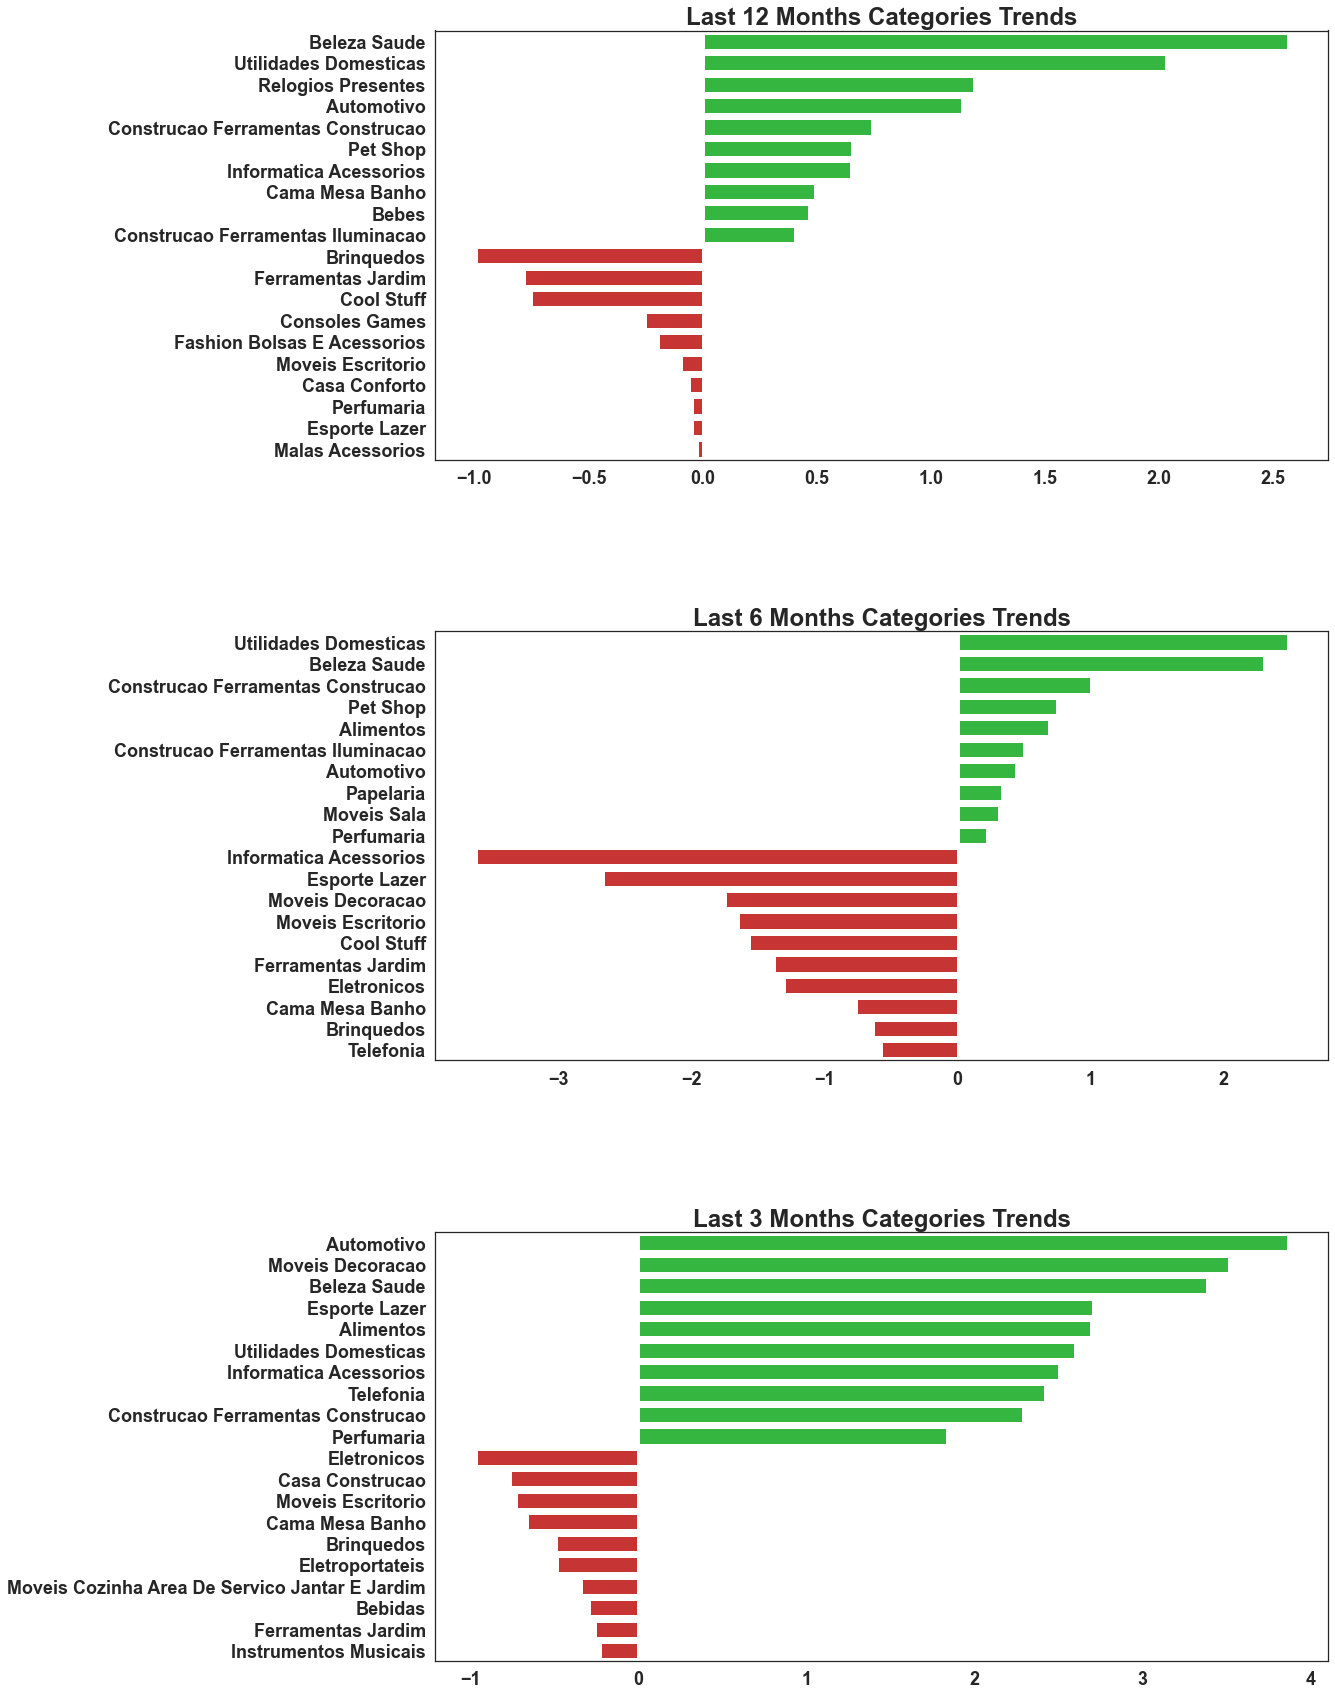

In [214]:
#viewing the data

fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(16,30))

# 12 months ___________________________________________________________________________________________________
sns.set_style("white")
categories_names = [re.sub('_',' ',i).title() for i in top_months12_trend.product_category_name]
sns.barplot(y=categories_names,
            x=top_months12_trend.trend_12_months,
            hue=top_months12_trend.direction,dodge = False,lw =3,palette =['#e01b1b','#1fcc30'],ax = ax1)

ax1.set_title("Last 12 Months Categories Trends",fontsize = 24)
ax1.set_xlabel("",fontsize=18)
ax1.set_ylabel("",fontsize=18)
ax1.tick_params(labelsize=18)
ax1.legend([],[], frameon=False)

# 6 months ___________________________________________________________________________________________________
categories_names2 = [re.sub('_',' ',i).title() for i in top_months6_trend.product_category_name]
sns.barplot(y=categories_names2,
            x=top_months6_trend.trend_6_months,
            hue=top_months6_trend.direction,dodge = False,lw =3,palette =['#e01b1b','#1fcc30'],ax = ax2)

ax2.set_title("Last 6 Months Categories Trends",fontsize = 24)
ax2.set_xlabel("",fontsize=18)
ax2.set_ylabel("",fontsize=18)
ax2.tick_params(labelsize=18)
ax2.legend([],[], frameon=False)

# 3 months ___________________________________________________________________________________________________
categories_names3 = [re.sub('_',' ',i).title() for i in top_months3_trend.product_category_name]
sns.barplot(y=categories_names3,
            x=top_months3_trend.trend_3_months,
            hue=top_months3_trend.direction,dodge = False,lw =3,palette =['#e01b1b','#1fcc30'],ax = ax3)

ax3.set_title("Last 3 Months Categories Trends",fontsize = 24)
ax3.set_xlabel("",fontsize=18)
ax3.set_ylabel("",fontsize=18)
ax3.tick_params(labelsize=18)
ax3.legend([],[], frameon=False)

plt.subplots_adjust(hspace = 0.4)
plt.show()

Insights from temporal analysis:

Firstly, we identified that from 2016 to Feb\Mar 2018 we have a good trend of sales growth. However, from March 2018 to the end of our records (Aug 2018) we entered in a dangerous downward trend. Analyzing our heatmap, we also noticed that the downward trend occurs in all states, however, it is more intense in the states of BA and RJ, and less intense in SP and RS.

The analysis of trends in each of the categories can help us to reverse this situation. First, let's look at the categories with the biggest downtrends. First, it is worth relating this information to which category generates more orders and revenue. A category that draws attention in this regard is "Cama Mesa Banho" ("Bed Table Bath"), champion in number of orders, this category presents a good annual growth trend, however, looking at the last 6 and 3 months we see a downward trend emerge. So, it seems to be a good idea to invest in marketing and advertising campaigns in this category to reverse this trend.

Its also good to observe the categories with a positive growth trend but without so many orders\revenues, because they have a great potential to generate value, and therefore also deserve a special investment. In this condition we observe for example the categories "Automotivo", "Beleza Saude", Utilidades Domesticas" ("Automotive", "Beauty and Health" and "Household Utilities").